# Zillow regression project notes

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

## Contents <a name='contents'></a>

*Links will only work on a local copy, not in browser on GitHub*

1. <a href='#wrangle'>wrangle data</a>
    1. <a href='#getdata'> `get_zillow_data()`</a>
    2. <a href='#missingdata'>Dealing with unnessecary columns</a>
2. <a href='#cleaning'>Cleaning and preparing the data</a>
3. <a href='#explore'>Explore the data</a>
    1. <a href='#univariate'>Univariate</a>
    2. <a href='#multivariate'>Multivariate</a>
    3. <a href='#categorical'>Categorical</a>
4. <a href='#featureengineering'>Feature Engineering</a>
5. <a href='#models'>Models</a>

## Wrangle data <a name='wrangle'></a>

<a href='#contents'>Top</a>

### Description of `wrangle.py`

The custom module `wrangle.py` contains functions that access the database, clean and prepare the data.

In [2]:
import wrangle

### Getting the data from the database <a name = 'getdata'></a>

Use the `get_zillow_data()` function to access the database or the .csv file to retrieve the data.  It takes the following arguments:
- `query_db=False` : forces a database query even if the .csv file for the data is present
It returns the following:
- A dataframe containing the data from the database.

In [3]:
df = wrangle.get_zillow_data()

Returning saved csv file.


In [4]:
original_shape = df.shape
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,123199,11508656,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,NaN,NaN,58010.0,320531.0,2016.0,262521.0,3687.75,NaN,NaN,6.037621e+13
1,1739447,12854999,NaN,NaN,NaN,2.0,4.0,NaN,6.0,2.0,...,NaN,NaN,149166.0,426363.0,2016.0,277197.0,5047.80,NaN,NaN,6.037403e+13
2,421832,11532400,NaN,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,NaN,NaN,78493.0,224273.0,2016.0,145780.0,2700.53,NaN,NaN,6.037276e+13
3,184933,12074210,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,NaN,NaN,95459.0,477322.0,2016.0,381863.0,5291.95,NaN,NaN,6.037301e+13
4,1049449,11978142,NaN,NaN,NaN,1.0,2.0,NaN,4.0,1.0,...,NaN,NaN,142245.0,643551.0,2016.0,501306.0,9267.35,NaN,NaN,6.037183e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,2680825,14177337,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,1.0,NaN,96892.0,290017.0,2016.0,193125.0,7243.84,NaN,NaN,6.059012e+13
52437,1274952,12340380,NaN,NaN,NaN,1.0,2.0,NaN,4.0,1.0,...,NaN,NaN,63718.0,150574.0,2016.0,86856.0,2047.91,NaN,NaN,6.037553e+13
52438,2768495,13023520,NaN,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,NaN,NaN,80921.0,258626.0,2016.0,177705.0,3263.64,NaN,NaN,6.037405e+13
52439,2611275,10846370,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,NaN,NaN,55067.0,88795.0,2016.0,33728.0,1120.13,NaN,NaN,6.037129e+13


<a href='#content'>Top</a>

### Dealing with the missing data <a name = 'missingdata'></a>

There are a lot of null values.  Use `return_col_percent_null()` to see how much per column.

In [5]:
df_missing_data = wrangle.return_col_percent_null(df)

In [6]:
df_missing_data.sort_values('percent_null', ascending=False)

,column_name,percent_null,count_null
15,finishedsquarefeet15,1.0000,52441
7,buildingclasstypeid,1.0000,52441
14,finishedsquarefeet13,1.0000,52441
42,storytypeid,0.9991,52394
4,basementsqft,0.9991,52394
47,yardbuildingsqft26,0.9988,52378
3,architecturalstyletypeid,0.9987,52371
44,typeconstructiontypeid,0.9986,52365
50,fireplaceflag,0.9985,52360
17,finishedsquarefeet6,0.9969,52276


Drop any column that has more than 0.01 of data missing. Also drop any dataleakage columns; these are `taxamount` and `structuretaxvaluedollarcnt`.

Investigate `calculatedbathnbr`, `finishedsquarefeet12`, `fullbathcnt`.

In [7]:
df[['calculatedbathnbr', 'fullbathcnt','bathroomcnt', 'bedroomcnt']]

,calculatedbathnbr,fullbathcnt,bathroomcnt,bedroomcnt
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,4.0
2,1.0,1.0,1.0,3.0
3,2.0,2.0,2.0,2.0
4,1.0,1.0,1.0,2.0
...,...,...,...,...
52436,3.0,3.0,3.0,4.0
52437,1.0,1.0,1.0,2.0
52438,1.0,1.0,1.0,3.0
52439,2.0,2.0,2.0,3.0


Drop `calculatedbathnbr` and `fullbathcnt`, the data can be calculated from the other two columns

In [8]:
df[['finishedsquarefeet12', 'calculatedfinishedsquarefeet']]

,finishedsquarefeet12,calculatedfinishedsquarefeet
0,1110.0,1110.0
1,1288.0,1288.0
2,948.0,948.0
3,1498.0,1498.0
4,1228.0,1228.0
...,...,...
52436,2055.0,2055.0
52437,899.0,899.0
52438,964.0,964.0
52439,1554.0,1554.0


This one looks like a repetition of data.  Drop `finishedsquarefeet12`. `rmcnt` should be at least the sum of `bathroomcnt` and `bedroomcnt`, but isn't always.  Drop it. Consider a `min_room` column instead.

In [9]:
(df['roomcnt'] >= (df['bathroomcnt']+df['bedroomcnt'])).mean()

0.2617608359871093

There is already latitude and longitude.  Plus it looks like some of the zip codes are outside of the range for California. These can be dropped too.  Also, drop the census blocks, as the project is not going to go into census data.

In [10]:
df['regionidzip'].describe()

count     52415.000000
mean      96635.846380
std        4605.107533
min       95982.000000
25%       96206.000000
50%       96412.000000
75%       96995.000000
max      399675.000000
Name: regionidzip, dtype: float64

In addition, drop the columns that are foreign keys: `propertylandusetypeid` and `regionidcounty`.  `propertycountylandusecode` might be useful, but not for the MVP.  `assessmentyear` can calso be dropped as it is all the same value, 2016.

In [11]:
df[['assessmentyear']].value_counts()

assessmentyear
2016.0            52441
dtype: int64

`id` can also be dropped, use `parcelid` instead

In [12]:
df = wrangle.zillow_drop_columns(df)
df

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt
0,11508656,2.0,2.0,1110.0,6037.0,33879703.0,-118406604.0,1350.0,1912.0,320531.0
1,12854999,2.0,4.0,1288.0,6037.0,33976669.0,-117834686.0,8386.0,1963.0,426363.0
2,11532400,1.0,3.0,948.0,6037.0,33990330.0,-118414200.0,4700.0,1947.0,224273.0
3,12074210,2.0,2.0,1498.0,6037.0,34181237.0,-118226109.0,8297.0,1947.0,477322.0
4,11978142,1.0,2.0,1228.0,6037.0,34124301.0,-118178791.0,3760.0,1931.0,643551.0
...,...,...,...,...,...,...,...,...,...,...
52436,14177337,3.0,4.0,2055.0,6059.0,33879788.0,-117874125.0,6960.0,1959.0,290017.0
52437,12340380,1.0,2.0,899.0,6037.0,33907707.0,-118150457.0,6527.0,1953.0,150574.0
52438,13023520,1.0,3.0,964.0,6037.0,34112534.0,-117903417.0,5985.0,1954.0,258626.0
52439,10846370,2.0,3.0,1554.0,6037.0,34175592.0,-118436145.0,5880.0,1952.0,88795.0


In [13]:
wrangle.return_col_percent_null(df)

,column_name,percent_null,count_null
0,parcelid,0.0000,0
1,bathroomcnt,0.0000,0
2,bedroomcnt,0.0000,0
3,calculatedfinishedsquarefeet,0.0016,82
4,fips,0.0000,0
5,latitude,0.0000,0
6,longitude,0.0000,0
7,lotsizesquarefeet,0.0070,369
8,yearbuilt,0.0022,116
9,taxvaluedollarcnt,0.0000,1


Because the remaining null values are so little of the data, they can be simply dropped.

Much better.  It is worth noting that any of the data dropped can be joined back to dataframe for exploration if needed.

<a href='#contents'>Top</a>

## Cleaning and preparing the data <a name='cleaning'></a>

- Clear the `fips` column to say the county name.
- fix latitude and longitude values

In [14]:
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet', 'yearbuilt',
       'taxvaluedollarcnt'],
      dtype='object')

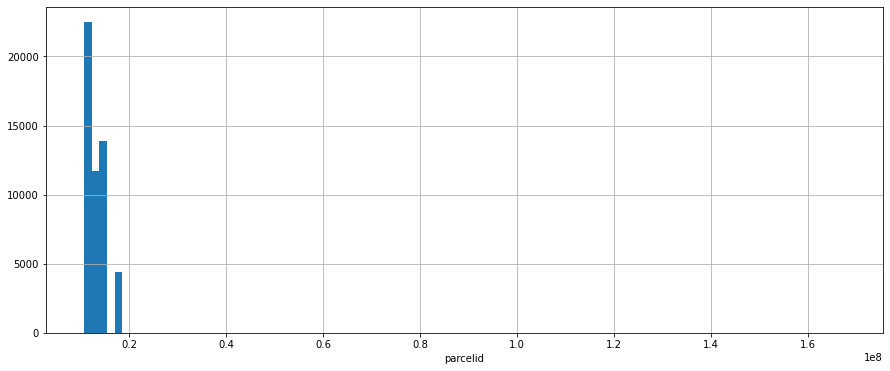

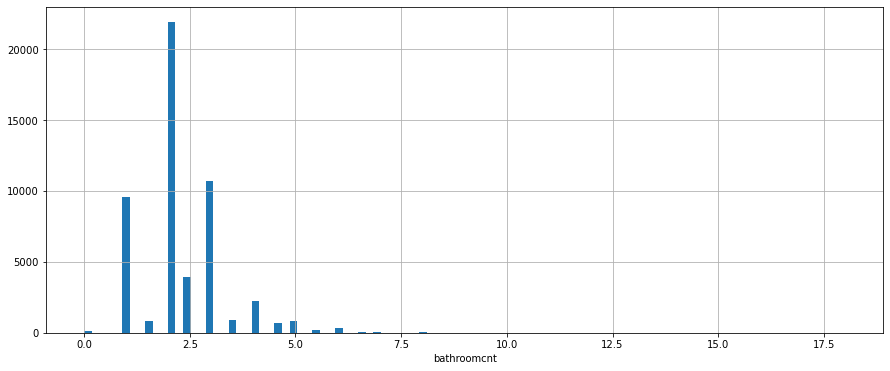

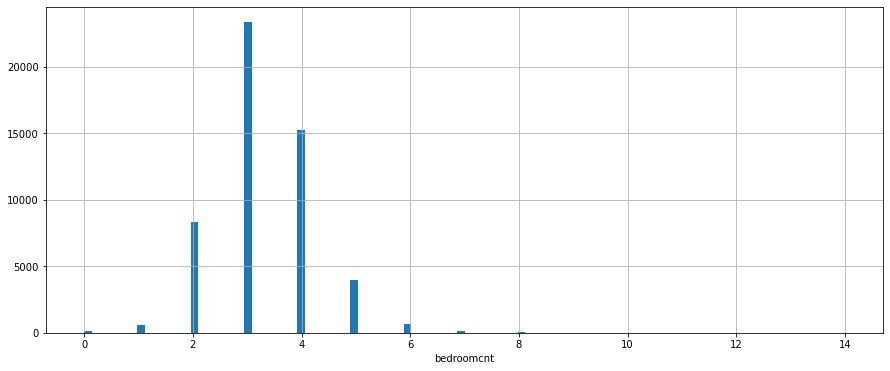

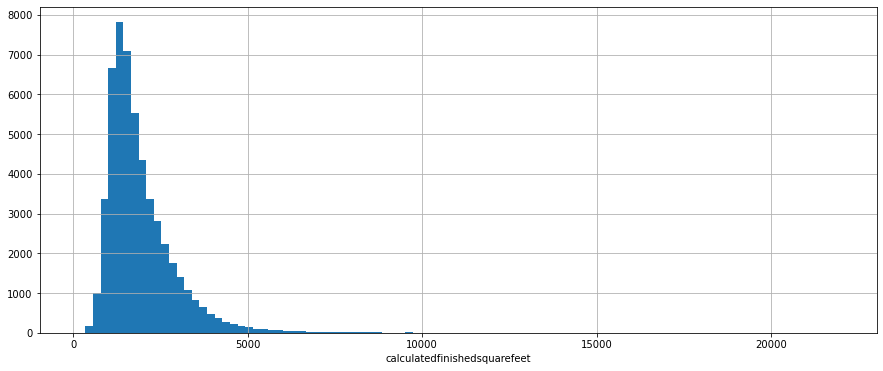

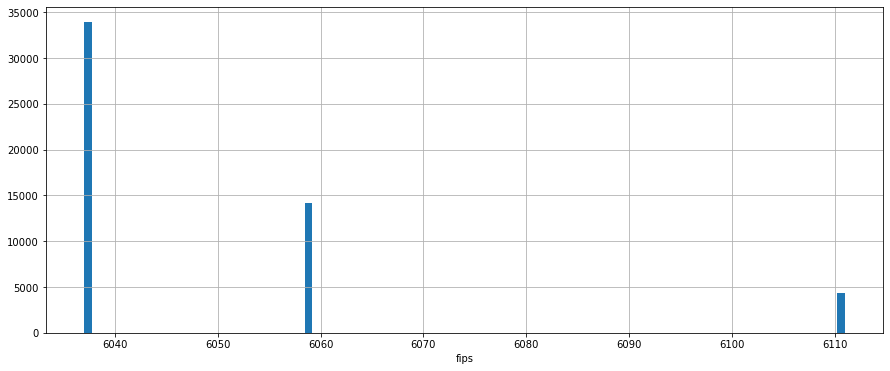

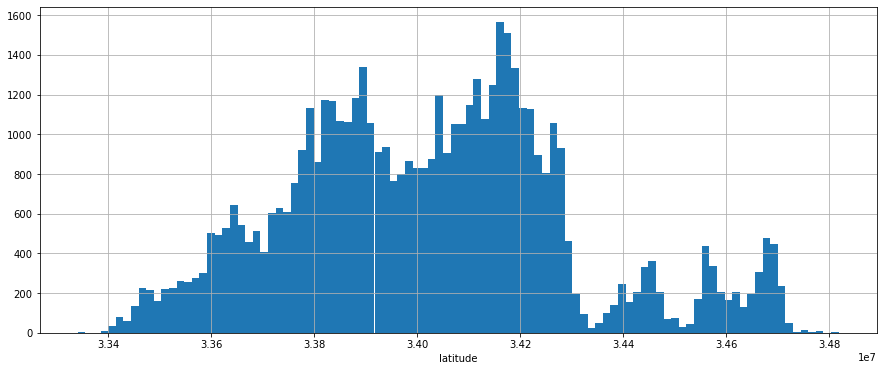

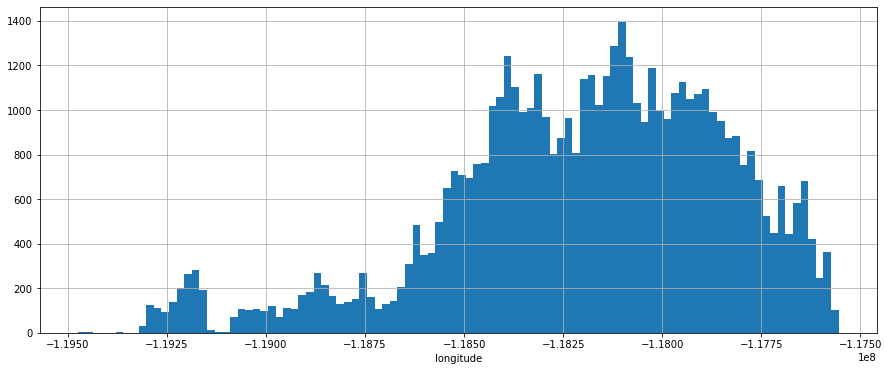

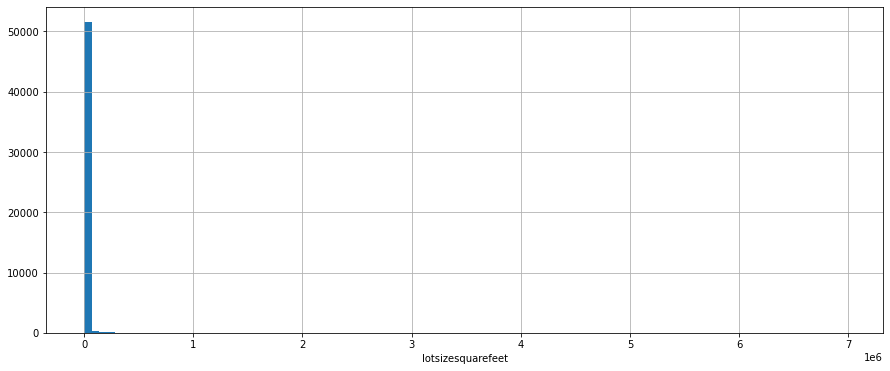

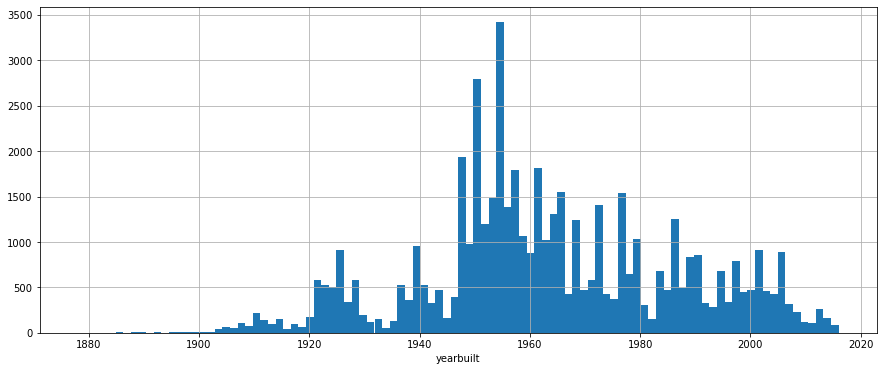

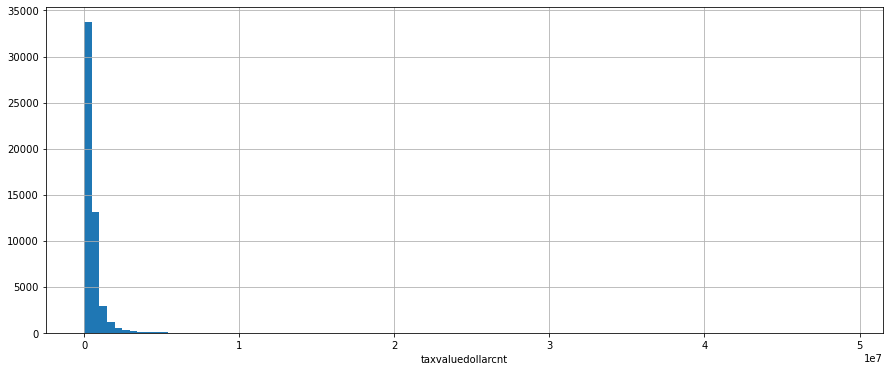

In [15]:
for column in df.columns:
    plt.figure(figsize=(15,6))
    df[column].hist(bins=100)
    plt.xlabel(column)
    plt.show()

In [16]:
df.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt
count,5.244100e+04,52441.000000,52441.000000,52359.000000,52441.000000,5.244100e+04,5.244100e+04,5.207200e+04,52325.000000,5.244000e+04
mean,1.299912e+07,2.299403,3.300681,1922.890754,6049.132149,3.402254e+07,-1.181942e+08,1.133962e+04,1963.393884,5.296882e+05
std,3.411444e+06,1.022772,0.949094,1004.365838,21.029067,2.739787e+05,3.566626e+05,8.674763e+04,23.133571,7.518946e+05
min,1.071186e+07,0.000000,0.000000,128.000000,6037.000000,3.334062e+07,-1.194754e+08,2.360000e+02,1878.000000,1.000000e+03
25%,1.151022e+07,2.000000,3.000000,1268.000000,6037.000000,3.382691e+07,-1.184007e+08,5.583000e+03,1950.000000,1.937475e+05
50%,1.257764e+07,2.000000,3.000000,1659.000000,6037.000000,3.402378e+07,-1.181531e+08,6.840500e+03,1961.000000,3.736120e+05
75%,1.412953e+07,3.000000,4.000000,2306.000000,6059.000000,3.418715e+07,-1.179292e+08,8.798250e+03,1979.000000,6.193012e+05
max,1.676878e+08,18.000000,14.000000,21929.000000,6111.000000,3.481877e+07,-1.175546e+08,6.971010e+06,2016.000000,4.906124e+07


A major source of outliers is `lotsizesquarefeet`.

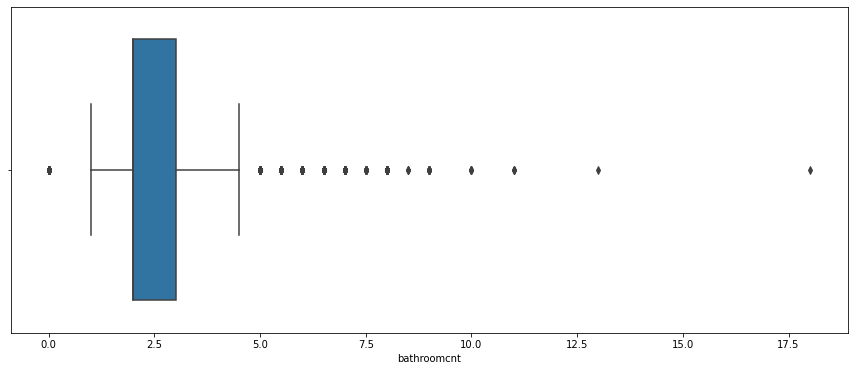

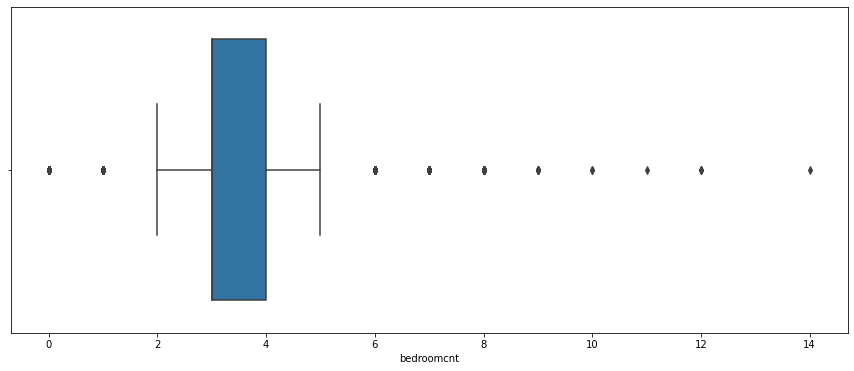

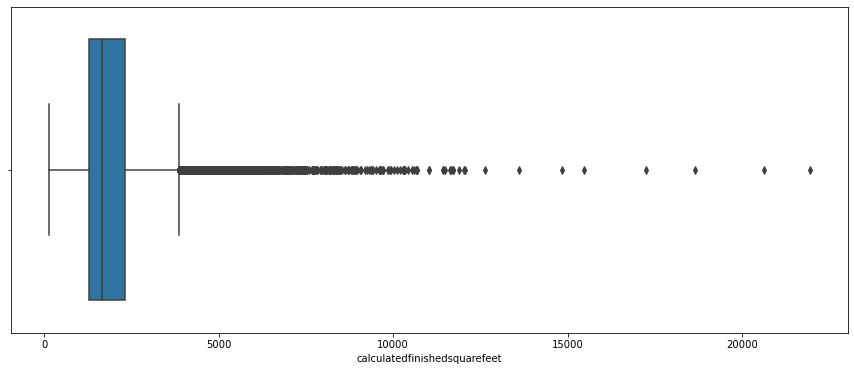

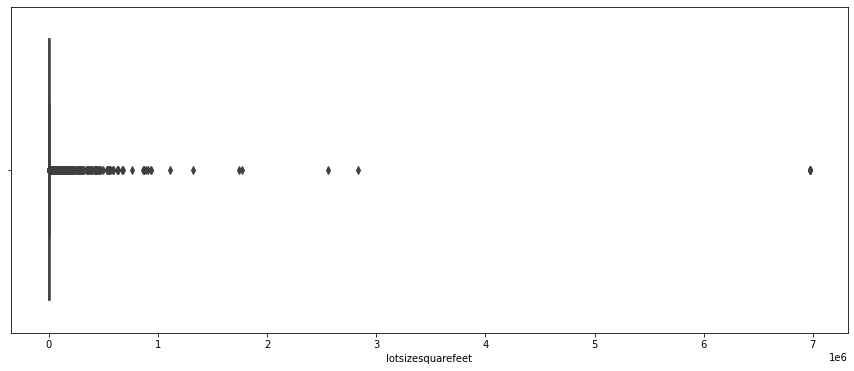

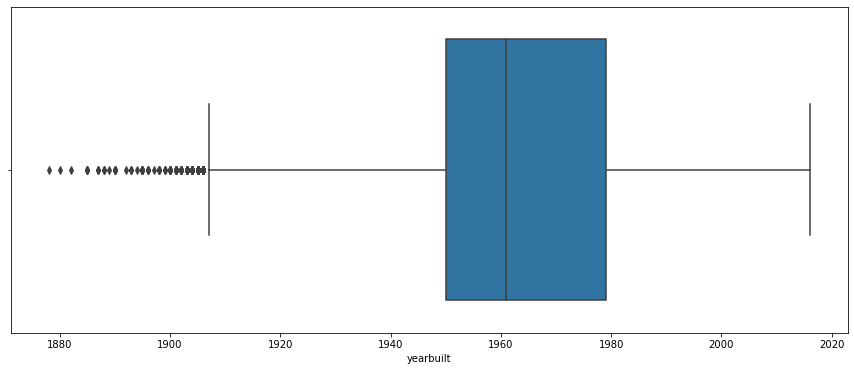

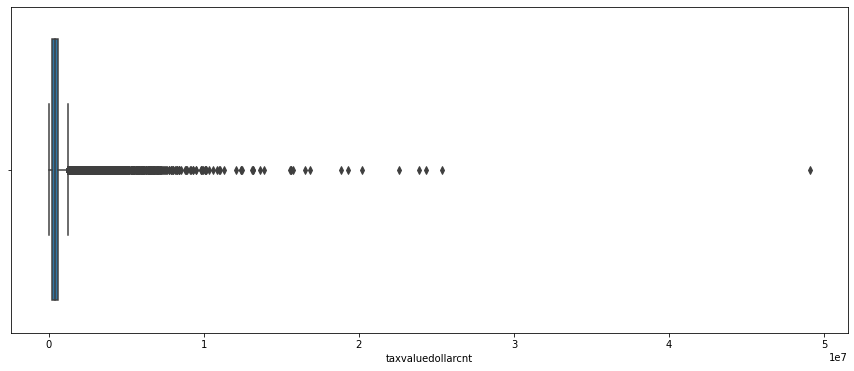

In [17]:
for column in ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt']:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=column, data=df)
    plt.show()

Some of the ranges are a bit funny, consider:
- `bathroomcnt` and  `bedroomcnt` of 0 or larger than 6 can be excluded.  The average zillow user will probably not buy one of these
- `calculatedfinishedsquarefeet` in an extreme; mainly very small and very large.  Exlcude any house smaller than 150 square feet or larger than 6000.
- `lotsizesquarefeet` has some very extreme outliers (the max is 160 acres), exclude any lots that are above 5 acres (2.178002e+5 square feet; and this still leaves a great many outliers).

Also, some of the data can be cast into better types:
- Anything with a max below 255 can be `uint8` and others can be `uint`
- `taxvaluedollarcnt`, `calculatedfinishedsquarefeet` and `lotsizesquarefeet` can be cast as `uint`

`fips` can be mapped to county names and `latitude` and `logitude` need to be multiplied to get the correct values.

In [18]:
df = wrangle.prepare_zillow_data(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51295 entries, 0 to 52440
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      51295 non-null  int64  
 1   bathroomcnt                   51295 non-null  float64
 2   bedroomcnt                    51295 non-null  uint8  
 3   calculatedfinishedsquarefeet  51295 non-null  uint64 
 4   latitude                      51295 non-null  float64
 5   longitude                     51295 non-null  float64
 6   lotsizesquarefeet             51295 non-null  float64
 7   yearbuilt                     51295 non-null  uint64 
 8   taxvaluedollarcnt             51295 non-null  uint64 
 9   county                        51295 non-null  object 
dtypes: float64(4), int64(1), object(1), uint64(3), uint8(1)
memory usage: 4.0+ MB


In [20]:
(df.shape[0])/original_shape[0]

0.9781468698156023

No more nulls and $ \approx 0.98$ of the data is retained.

<a href='#contents'>Top</a>

## Explore data <a name='explore'></a>

First split the data to explore it.

In [21]:
train, validate, test = wrangle.split_zillow_data(df)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28725 entries, 52283 to 15115
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28725 non-null  int64  
 1   bathroomcnt                   28725 non-null  float64
 2   bedroomcnt                    28725 non-null  uint8  
 3   calculatedfinishedsquarefeet  28725 non-null  uint64 
 4   latitude                      28725 non-null  float64
 5   longitude                     28725 non-null  float64
 6   lotsizesquarefeet             28725 non-null  float64
 7   yearbuilt                     28725 non-null  uint64 
 8   taxvaluedollarcnt             28725 non-null  uint64 
 9   county                        28725 non-null  object 
dtypes: float64(4), int64(1), object(1), uint64(3), uint8(1)
memory usage: 2.2+ MB


In [23]:
train.head(3)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,county
52283,10883656,1.0,2,806,34.189934,-118.420067,7126.0,1951,114761,Los Angeles
314,11420675,1.0,2,972,33.923917,-118.353665,4852.0,1920,319803,Los Angeles
8507,12605471,1.0,3,973,33.815068,-118.282460,5717.0,1952,39915,Los Angeles


Will use the `explore.py` to see what it in the data.

In [24]:
import explore

<a href='#contents'>Top</a>

### Univariate data

Consider the univariate data. <a name='univariate'></a>

In [25]:
train.describe()[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt']]

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt
count,28725.000000,28725.000000,28725.000000,28725.000000,28725.000000,2.872500e+04
mean,2.268129,3.290896,1878.211070,9048.826527,1963.222385,4.969264e+05
std,0.931701,0.891973,859.317692,10857.692476,22.811497,5.485281e+05
min,1.000000,1.000000,326.000000,236.000000,1878.000000,1.000000e+03
25%,2.000000,3.000000,1266.000000,5568.000000,1950.000000,1.917610e+05
50%,2.000000,3.000000,1653.000000,6804.000000,1960.000000,3.708290e+05
75%,3.000000,4.000000,2277.000000,8691.000000,1979.000000,6.087910e+05
max,6.500000,6.000000,6000.000000,216820.000000,2015.000000,1.561849e+07


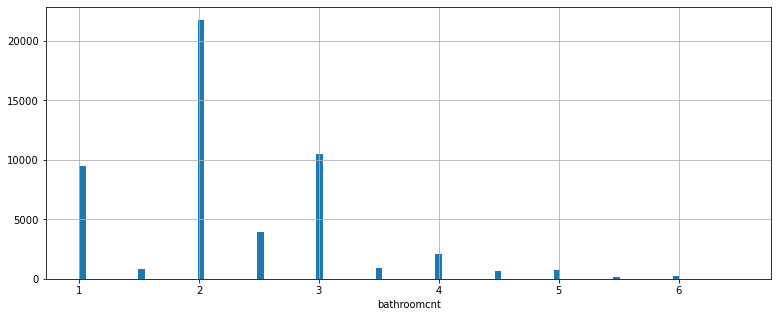

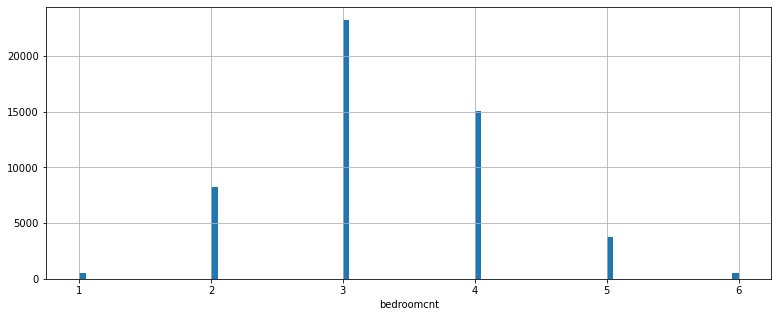

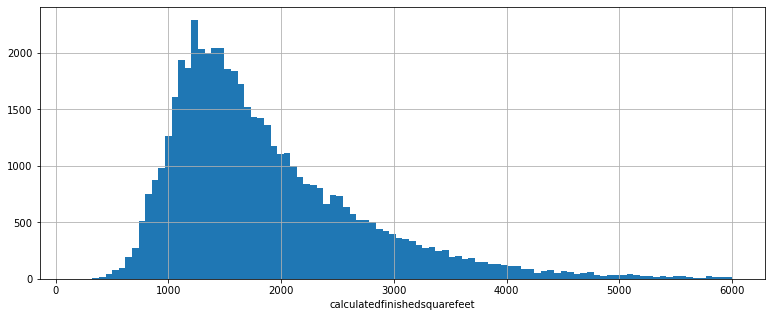

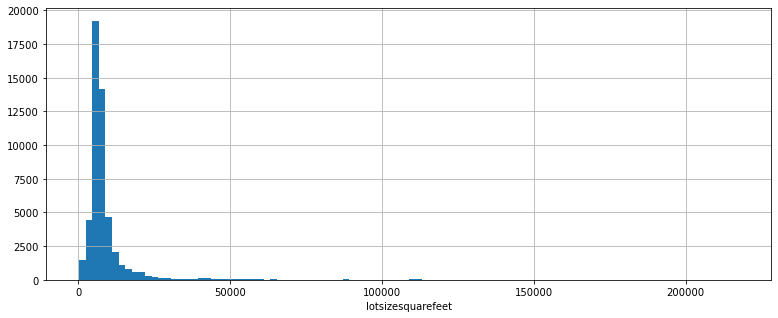

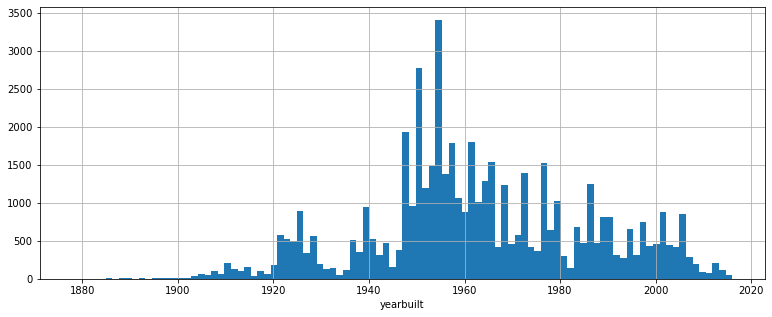

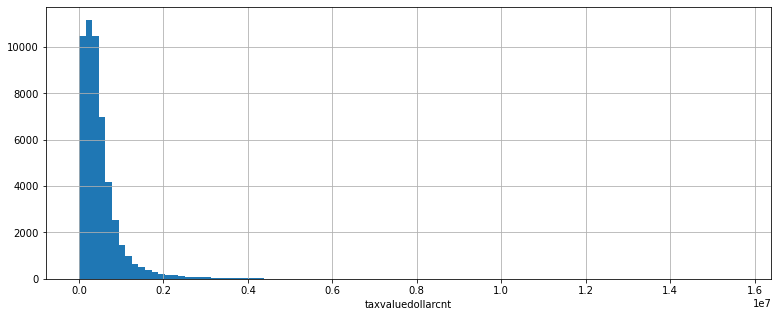

In [26]:
for column in ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt']:
    plt.figure(figsize=(13,5))
    df[column].hist(bins=100)
    plt.xlabel(column)
    plt.show()

Also consider boxplots

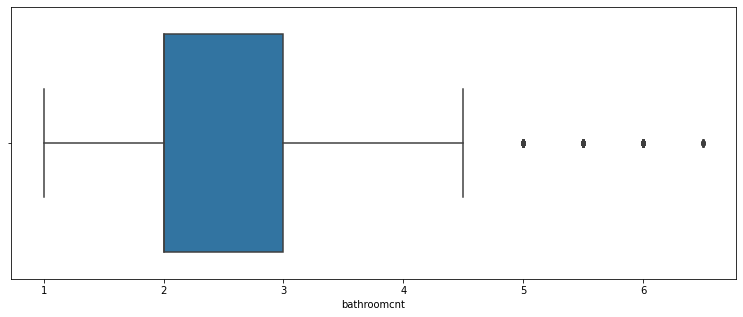

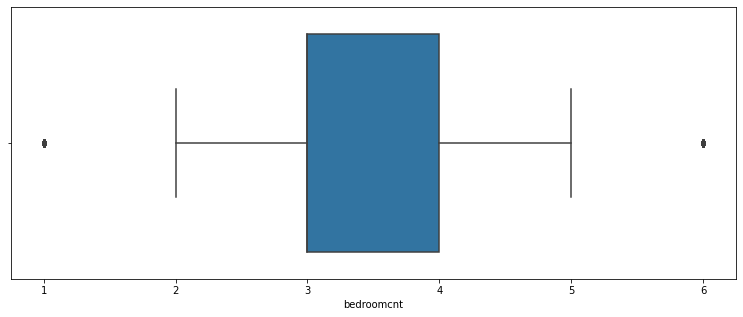

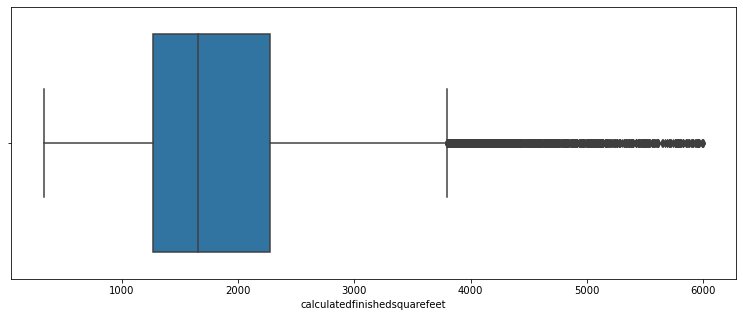

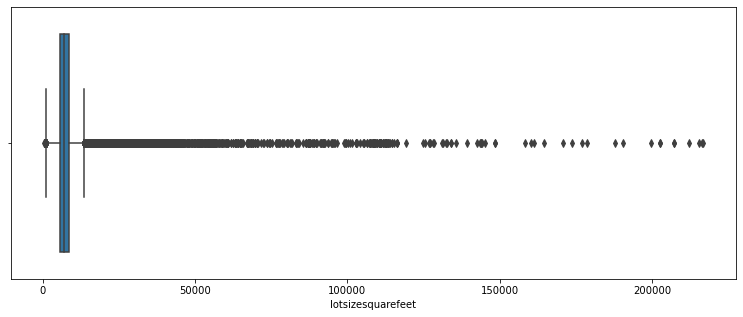

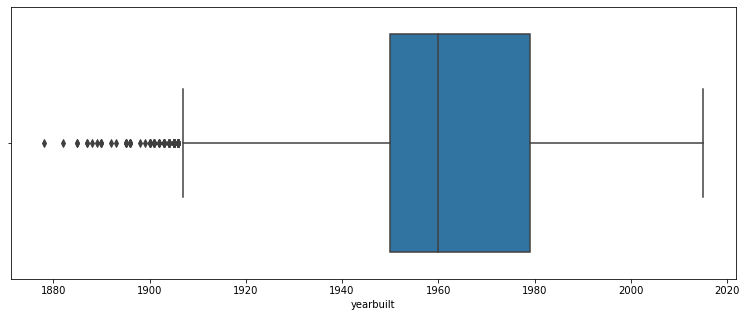

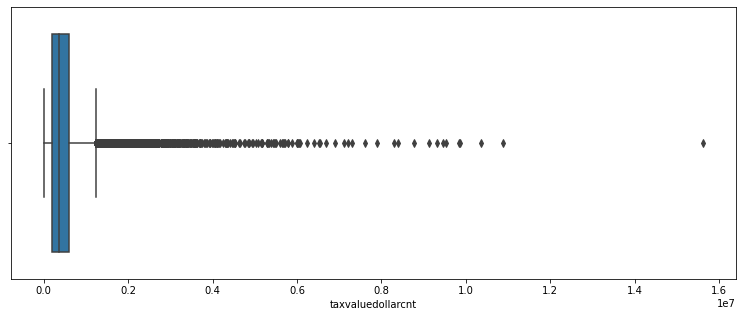

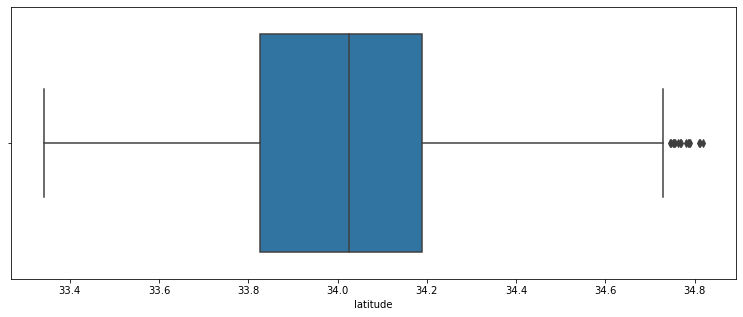

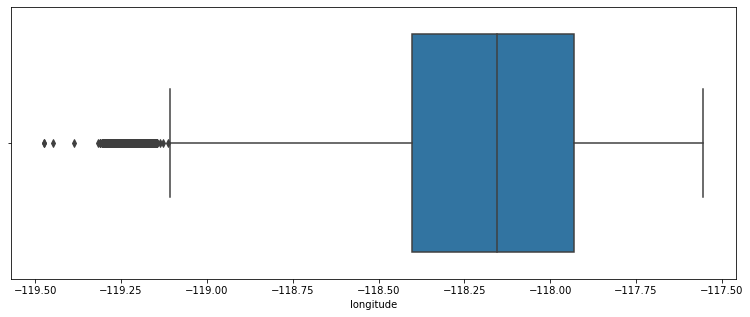

In [27]:
for column in ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'latitude', 'longitude']:
    plt.figure(figsize=(13,5))
    sns.boxplot(x=column, data=train)
    plt.show()

Most of the data is positively skewed with a lot of outliers.

<a href='#contents'>Top</a>

### Multivariate exploration <a name='multivariate'></a>

First consider all the variables plotted against the target.

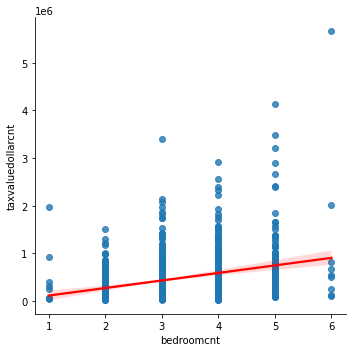

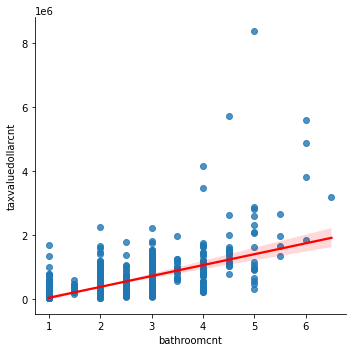

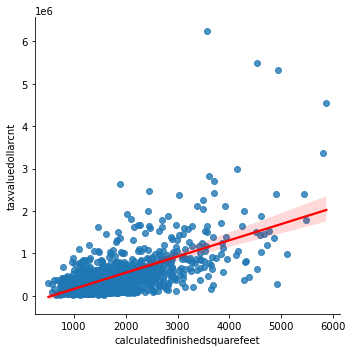

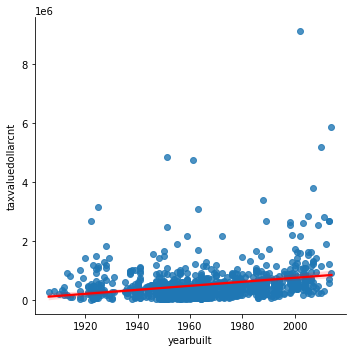

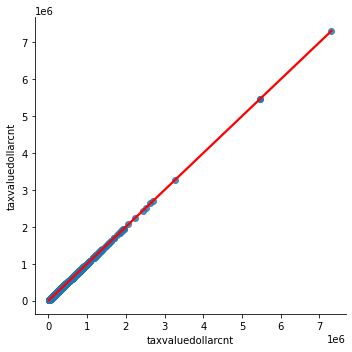

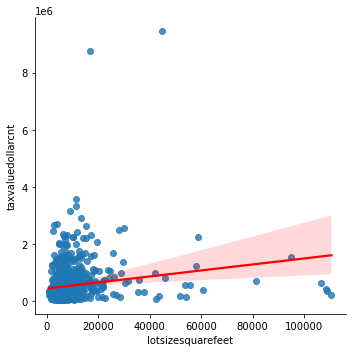

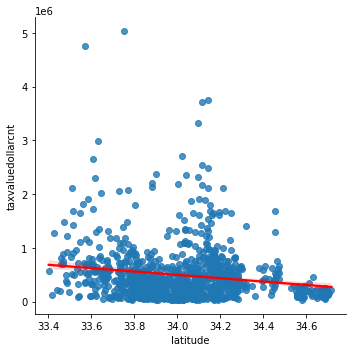

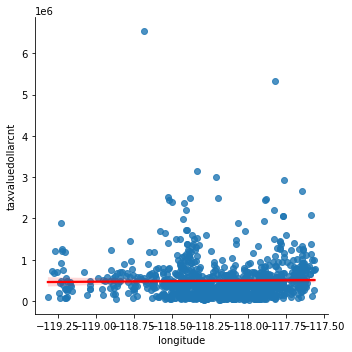

In [28]:
explore.plot_variable_pairs(train, columns_y=['taxvaluedollarcnt'])

`calculatedsquarefeet`, `bedroomcnt`, and `bathroomcnt` look like the most valuable.  Look at this nmumerically:

In [29]:
r_values = explore.r_values_vars(train)
r_values[r_values['column1_x_column2'].str.contains('taxvaluedollarcnt')].sort_values('r', ascending=False)

,column1_x_column2,r,p-value,reject_null
15,calculatedfinishedsquarefeet x taxvaluedollarcnt,0.552838,0.000000e+00,True
10,bathroomcnt x taxvaluedollarcnt,0.493155,0.000000e+00,True
4,bedroomcnt x taxvaluedollarcnt,0.240511,0.000000e+00,True
19,yearbuilt x taxvaluedollarcnt,0.185270,3.592117e-220,True
22,lotsizesquarefeet x taxvaluedollarcnt,0.154783,1.717529e-153,True
26,taxvaluedollarcnt x longitude,-0.022676,1.212905e-04,True
25,taxvaluedollarcnt x latitude,-0.158004,6.114175e-160,True


Confirms that these are the highest correlated variables.  Especially `calculatedfinishedsquarefeet` and `bathroomcnt`.

In [30]:
r_values.sort_values('r', ascending=False)

,column1_x_column2,r,p-value,reject_null
7,bathroomcnt x calculatedfinishedsquarefeet,0.843115,0.000000e+00,True
1,bedroomcnt x calculatedfinishedsquarefeet,0.629736,0.000000e+00,True
0,bedroomcnt x bathroomcnt,0.627306,0.000000e+00,True
15,calculatedfinishedsquarefeet x taxvaluedollarcnt,0.552838,0.000000e+00,True
8,bathroomcnt x yearbuilt,0.536816,0.000000e+00,True
10,bathroomcnt x taxvaluedollarcnt,0.493155,0.000000e+00,True
13,calculatedfinishedsquarefeet x yearbuilt,0.478951,0.000000e+00,True
2,bedroomcnt x yearbuilt,0.391004,0.000000e+00,True
14,calculatedfinishedsquarefeet x lotsizesquarefeet,0.292086,0.000000e+00,True
4,bedroomcnt x taxvaluedollarcnt,0.240511,0.000000e+00,True


<a href='#contents'>Top</a>

### Plotting by cataegorical variables <a name='categorical'></a>

First by county.

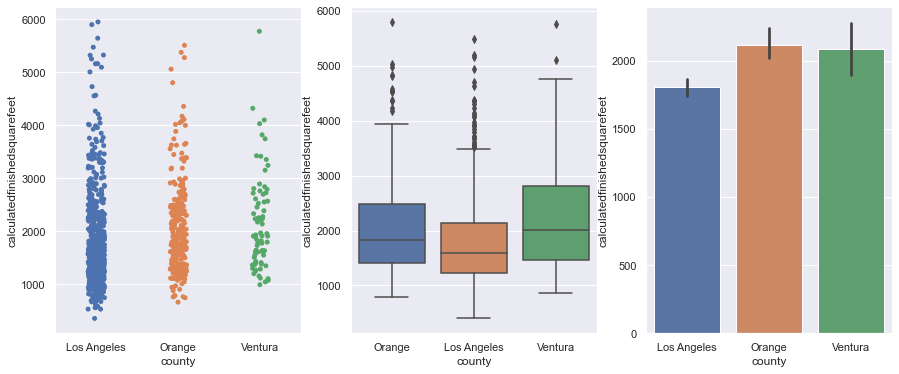

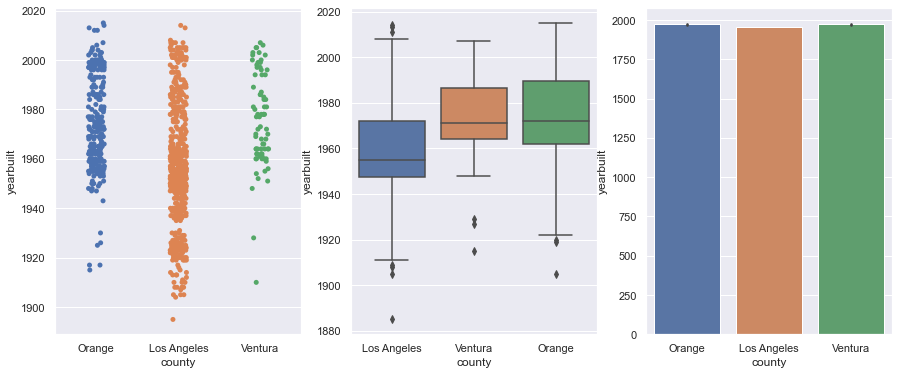

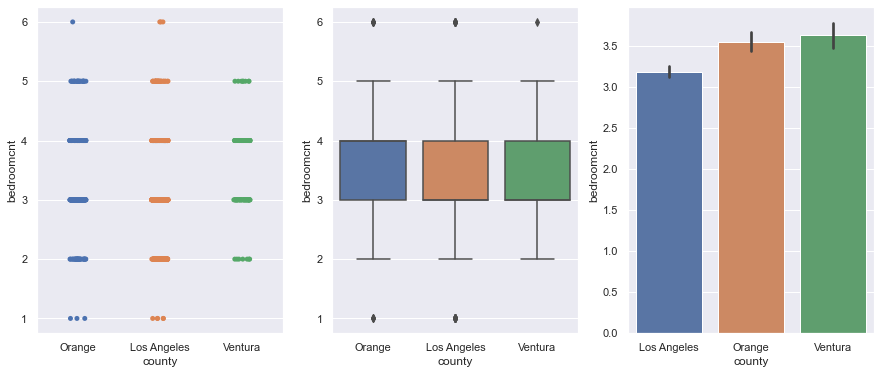

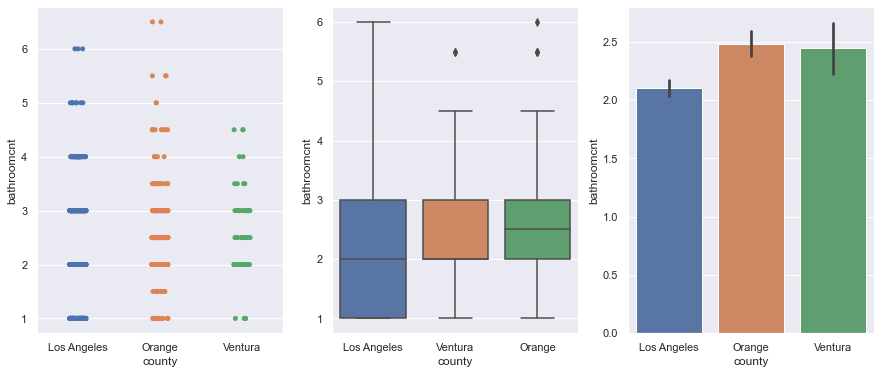

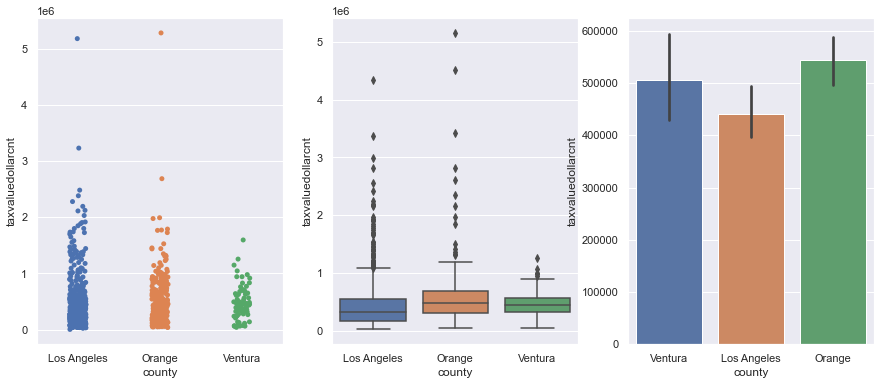

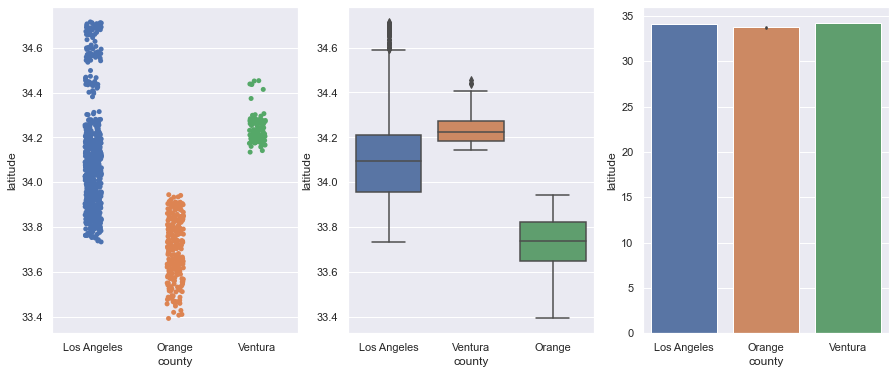

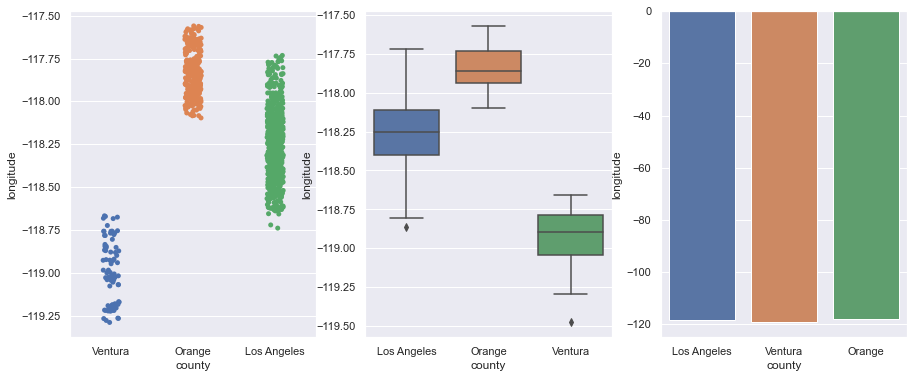

In [31]:
explore.plot_categorical_and_continuous_vars(train)

There are differences, but it looks like they can largely be explained by the `yearbuilt`; it appears that Ventura and Orange county were maybe developed in the second half of the 20th century.

By number of bathrooms

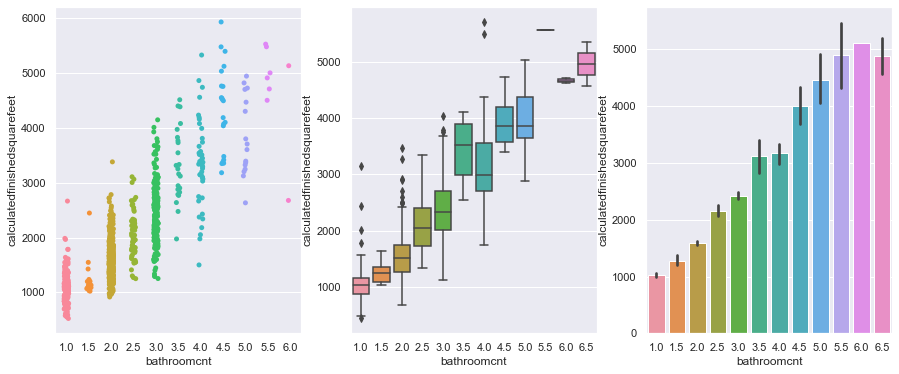

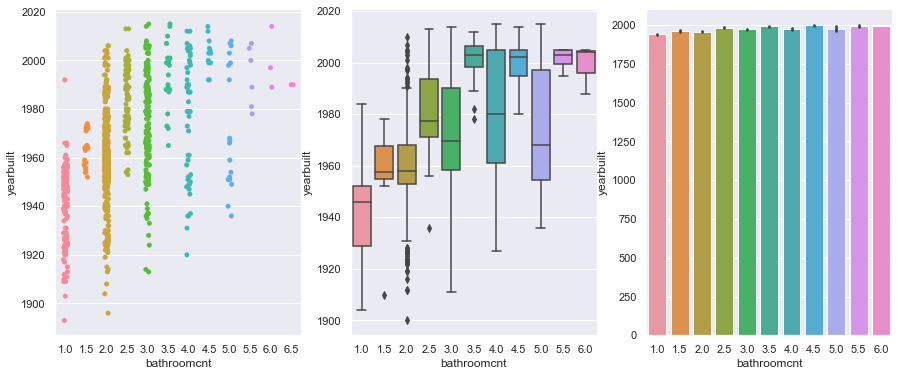

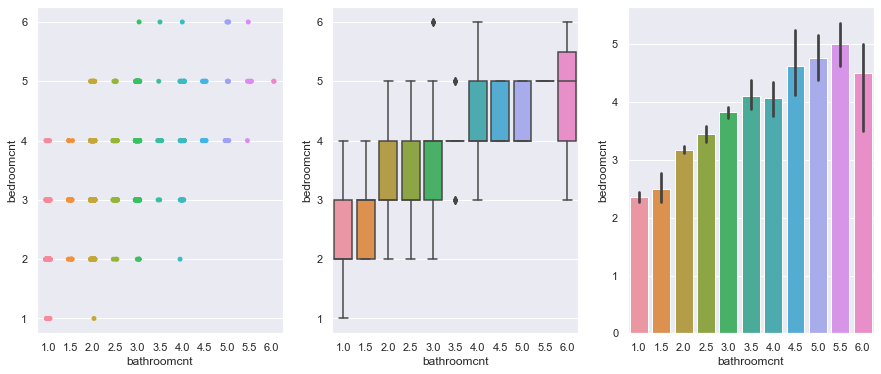

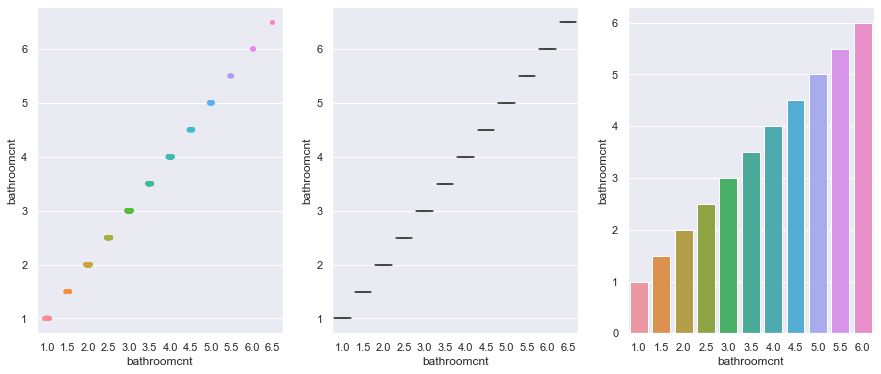

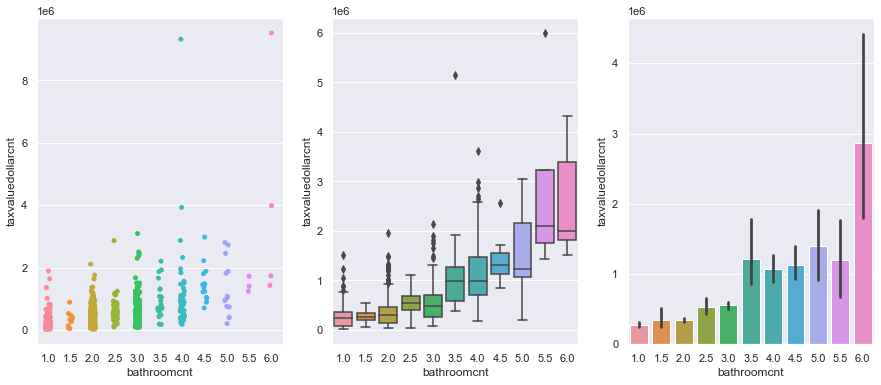

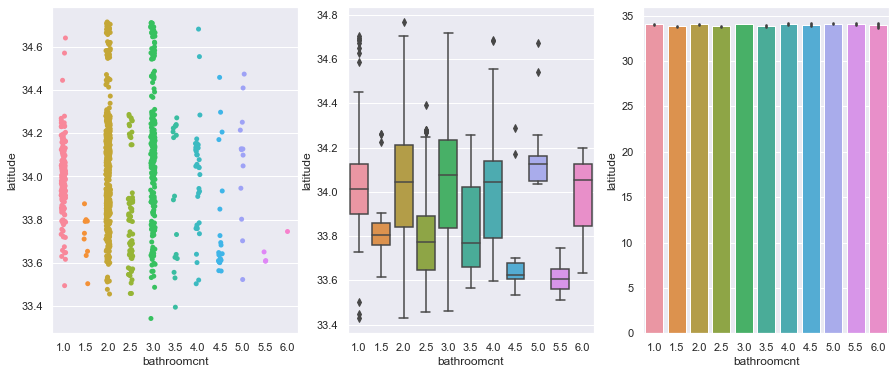

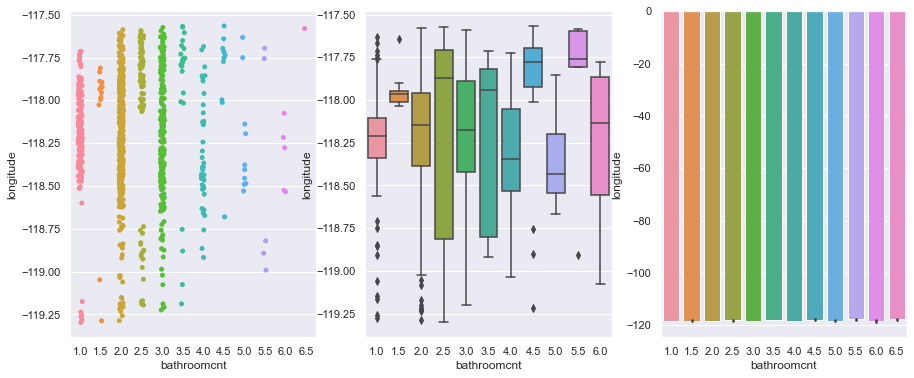

In [32]:
explore.plot_categorical_and_continuous_vars(train, columns_cat=['bathroomcnt'])

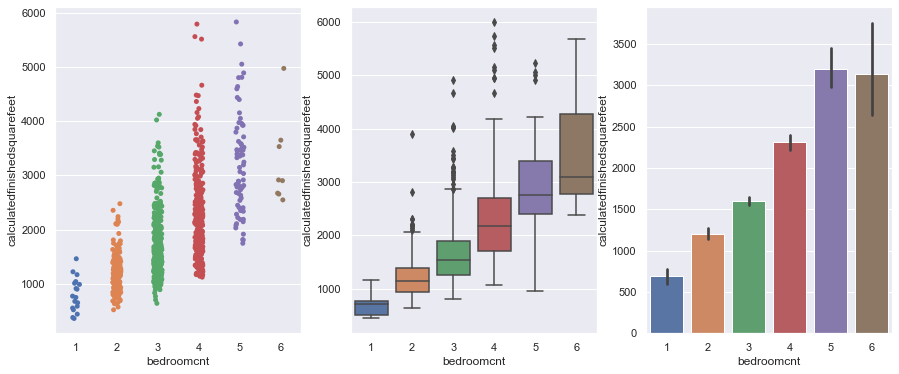

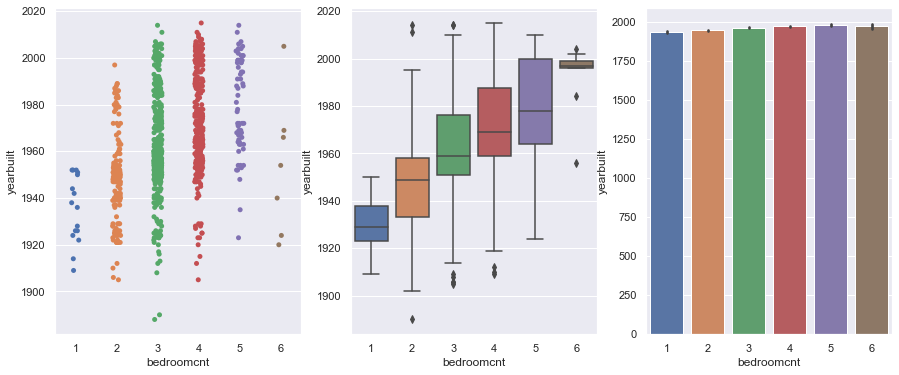

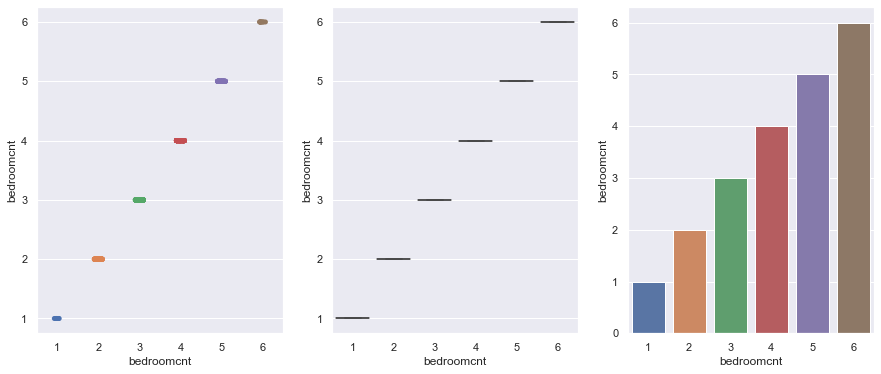

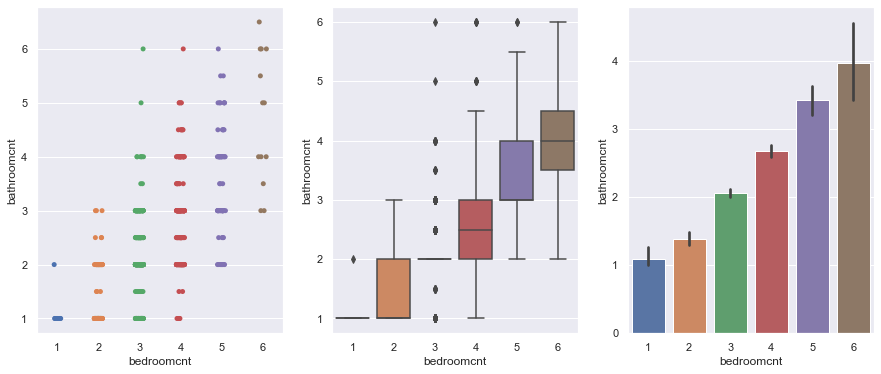

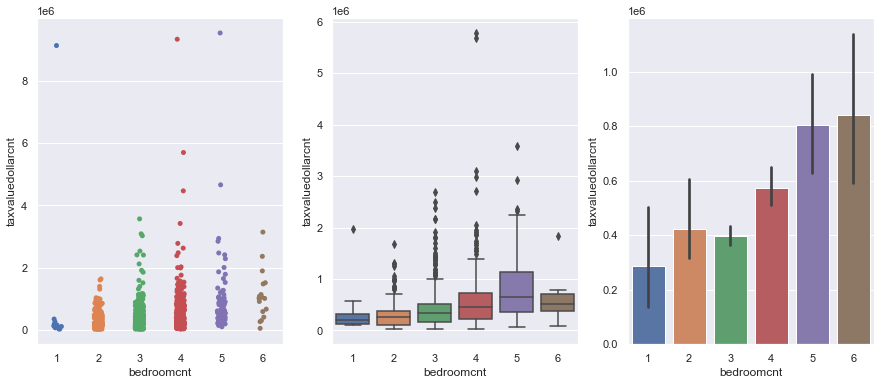

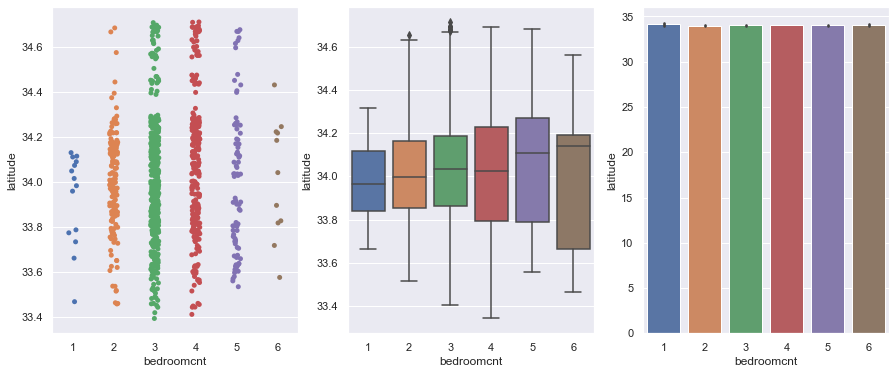

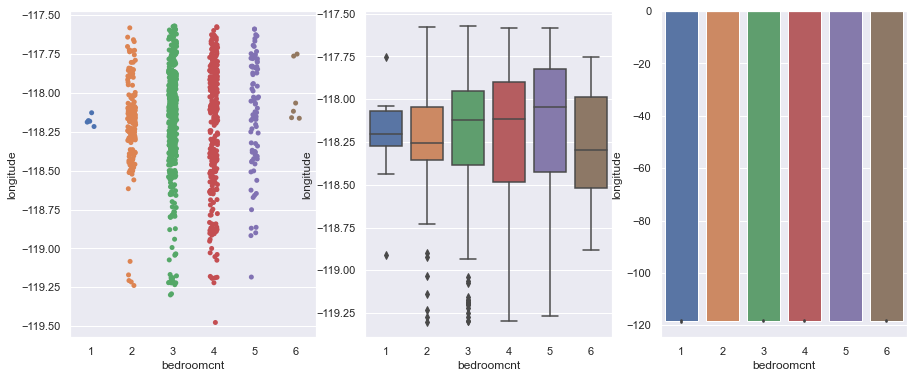

In [33]:
explore.plot_categorical_and_continuous_vars(train, columns_cat=['bedroomcnt'])

See if the variables differ by county.

In [34]:
explore.t_test_by_cat(train)

,category_name,column_name,p,reject_null
0,Los Angeles,calculatedfinishedsquarefeet,0.000000e+00,True
1,Los Angeles,yearbuilt,0.000000e+00,True
2,Los Angeles,bedroomcnt,0.000000e+00,True
3,Los Angeles,bathroomcnt,0.000000e+00,True
4,Los Angeles,taxvaluedollarcnt,1.515395e-116,True
5,Los Angeles,latitude,0.000000e+00,True
6,Los Angeles,longitude,0.000000e+00,True
7,Orange,calculatedfinishedsquarefeet,1.115506e-161,True
8,Orange,yearbuilt,0.000000e+00,True
9,Orange,bedroomcnt,1.087574e-115,True


they do.

<a href='#contents'>Top</a>

## Feature engineering <a name='featureengineering'></a>

Use SelectKBest

In [35]:
#encode counties

train = wrangle.encode_columns(train)
train

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,county_Orange,county_Ventura
52283,10883656,1.0,2,806,34.189934,-118.420067,7126.0,1951,114761,0,0
314,11420675,1.0,2,972,33.923917,-118.353665,4852.0,1920,319803,0,0
8507,12605471,1.0,3,973,33.815068,-118.282460,5717.0,1952,39915,0,0
10198,10813221,2.0,3,3523,34.160131,-118.549554,132823.0,1952,1411428,0,0
49068,12007114,1.0,4,1689,34.087584,-118.294801,6250.0,1919,64151,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6286,12019426,3.0,2,2106,34.098439,-118.373147,11410.0,1952,1946804,0,0
25861,10900513,2.0,3,1444,34.163332,-118.385320,6632.0,1939,280651,0,0
36967,14461594,4.5,5,5791,33.563771,-117.581695,10432.0,2001,2071069,1,0
37308,10989736,3.0,3,2462,34.243992,-118.355236,20811.0,1949,720000,0,0


In [36]:
# make X and y

X_train, y_train = wrangle.make_X_and_y(train)
X_train.drop(columns = 'parcelid')

#scale square feet
X_train_scaled = wrangle.zillow_scale(X_train).drop(columns = 'calculatedfinishedsquarefeet')

X_train_scaled

,parcelid,bathroomcnt,bedroomcnt,latitude,longitude,lotsizesquarefeet,yearbuilt,county_Orange,county_Ventura,calculatedfinishedsquarefeet_scaled,lotsizesquarefeet_scaled
52283,10883656,1.0,2,34.189934,-118.420067,7126.0,1951,0,0,-0.837784,0.103106
314,11420675,1.0,2,33.923917,-118.353665,4852.0,1920,0,0,-0.673591,-0.625040
8507,12605471,1.0,3,33.815068,-118.282460,5717.0,1952,0,0,-0.672601,-0.348063
10198,10813221,2.0,3,34.160131,-118.549554,132823.0,1952,0,0,1.849654,40.351905
49068,12007114,1.0,4,34.087584,-118.294801,6250.0,1919,0,0,0.035608,-0.177394
...,...,...,...,...,...,...,...,...,...,...,...
6286,12019426,3.0,2,34.098439,-118.373147,11410.0,1952,0,0,0.448071,1.474864
25861,10900513,2.0,3,34.163332,-118.385320,6632.0,1939,0,0,-0.206726,-0.055075
36967,14461594,4.5,5,33.563771,-117.581695,10432.0,2001,1,0,4.092977,1.161703
37308,10989736,3.0,3,34.243992,-118.355236,20811.0,1949,0,0,0.800198,4.485110


In [37]:
explore.get_k_features (X_train_scaled, y_train, 10)

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'yearbuilt',
 'county_Orange',
 'calculatedfinishedsquarefeet_scaled',
 'lotsizesquarefeet_scaled']

<a href='#contents'>Top</a>

## Models <a name='models'></a>

In [38]:
#prepare the validate set
validate = wrangle.encode_columns(validate)
X_validate, y_validate = wrangle.make_X_and_y(validate)
X_validate.drop(columns = 'parcelid')
X_validate_scaled = wrangle.zillow_scale(X_validate).drop(columns = ['calculatedfinishedsquarefeet', 'lotsizesquarefeet'])

In [39]:
#make y_df into dataframes to store outcomes

y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

y_validate

,taxvaluedollarcnt
27247,277308
21164,455491
32378,1410219
41773,254647
24554,500000
...,...
14863,683583
12833,624541
35654,265919
4315,624830


### Baseline Model

In [40]:
#mean baseline model
y_train['baseline_mean_pred'] = y_train['taxvaluedollarcnt'].mean()
y_validate['baseline_mean_pred'] = y_validate['taxvaluedollarcnt'].mean()

#median baseline model
y_train['baseline_median_pred'] = y_train['taxvaluedollarcnt'].median()
y_validate['baseline_median_pred'] = y_validate['taxvaluedollarcnt'].median()

#determine RSMSE
results = []

baseline_mean = {
    'model':'baseline_mean',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['baseline_mean_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['baseline_mean_pred'])**(0.5)

}
baseline_median = {
    'model':'baseline_median',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['baseline_median_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['baseline_median_pred'])**(0.5)

}
results.append(baseline_mean)
results.append(baseline_median)

pd.DataFrame(results)

,model,RMSE_train,RMSE_validate
0,baseline_mean,548518.510002,558482.090821
1,baseline_median,562825.998633,572775.815864


### Linear Regression Model

In [41]:
lm = LinearRegression(normalize = True)

lm.fit(X_train, y_train['taxvaluedollarcnt'])

y_train['lm_train_pred'] = lm.predict(X_train)

y_validate['lm_validate_pred'] = lm.predict(X_validate)

lm_rmse = {
    'model':'linear regression',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['lm_train_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['lm_validate_pred'])**(0.5)

}
results.append(lm_rmse)
pd.DataFrame(results)

,model,RMSE_train,RMSE_validate
0,baseline_mean,548518.510002,5.584821e+05
1,baseline_median,562825.998633,5.727758e+05
2,linear regression,434373.003948,5.469005e+16


In [42]:
#residuals
y_train['lm_residuals'] = y_train['lm_train_pred'] - y_train['taxvaluedollarcnt']
y_validate['lm_residuals'] = y_validate['lm_validate_pred'] - y_validate['taxvaluedollarcnt']

In [43]:
y_train

,taxvaluedollarcnt,baseline_mean_pred,baseline_median_pred,lm_train_pred,lm_residuals
52283,114761,496926.378729,370829.0,173056.0,58295.0
314,319803,496926.378729,370829.0,355328.0,35525.0
8507,39915,496926.378729,370829.0,240640.0,200725.0
10198,1411428,496926.378729,370829.0,1278976.0,-132452.0
49068,64151,496926.378729,370829.0,279552.0,215401.0
...,...,...,...,...,...
6286,1946804,496926.378729,370829.0,860160.0,-1086644.0
25861,280651,496926.378729,370829.0,402432.0,121781.0
36967,2071069,496926.378729,370829.0,1819648.0,-251421.0
37308,720000,496926.378729,370829.0,812032.0,92032.0


### LassoLars Model

In [44]:
lars = LassoLars(alpha=1.0)

lars.fit(X_train, y_train['taxvaluedollarcnt'])

y_train['lars_train_pred'] = lars.predict(X_train)

y_validate['lars_validate_pred'] = lars.predict(X_validate)

lars_rmse = {
    'model':'LassoLars regression',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['lars_train_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['lars_validate_pred'])**(0.5)

}
results.append(lars_rmse)
pd.DataFrame(results)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.509e+02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=7.206e+02, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:615: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 ite

,model,RMSE_train,RMSE_validate
0,baseline_mean,548518.510002,5.584821e+05
1,baseline_median,562825.998633,5.727758e+05
2,linear regression,434373.003948,5.469005e+16
3,LassoLars regression,459663.102449,4.729212e+05


In [45]:
#residuals
y_train['lars_residuals'] = y_train['lars_train_pred'] - y_train['taxvaluedollarcnt']
y_validate['lars_residuals'] = y_validate['lars_validate_pred'] - y_validate['taxvaluedollarcnt']

In [46]:
y_train

,taxvaluedollarcnt,baseline_mean_pred,baseline_median_pred,lm_train_pred,lm_residuals,lars_train_pred,lars_residuals
52283,114761,496926.378729,370829.0,173056.0,58295.0,2.320650e+05,1.173040e+05
314,319803,496926.378729,370829.0,355328.0,35525.0,3.573532e+05,3.755021e+04
8507,39915,496926.378729,370829.0,240640.0,200725.0,3.838830e+05,3.439680e+05
10198,1411428,496926.378729,370829.0,1278976.0,-132452.0,1.282784e+06,-1.286443e+05
49068,64151,496926.378729,370829.0,279552.0,215401.0,5.644190e+05,5.002680e+05
...,...,...,...,...,...,...,...
6286,1946804,496926.378729,370829.0,860160.0,-1086644.0,5.071470e+05,-1.439657e+06
25861,280651,496926.378729,370829.0,402432.0,121781.0,3.543459e+05,7.369492e+04
36967,2071069,496926.378729,370829.0,1819648.0,-251421.0,1.739076e+06,-3.319927e+05
37308,720000,496926.378729,370829.0,812032.0,92032.0,6.033707e+05,-1.166293e+05


### Polynomial Regression

In [47]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train['taxvaluedollarcnt'])

# predict train
y_train['poly_train_pred'] = lm2.predict(X_train_degree2)

# predict validate
y_validate['poly_validate_pred'] = lm2.predict(X_validate_degree2)

poly_rmse = {
    'model':'Polynomial regression',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['poly_train_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['poly_validate_pred'])**(0.5)

}
results.append(poly_rmse)
pd.DataFrame(results)

,model,RMSE_train,RMSE_validate
0,baseline_mean,548518.510002,5.584821e+05
1,baseline_median,562825.998633,5.727758e+05
2,linear regression,434373.003948,5.469005e+16
3,LassoLars regression,459663.102449,4.729212e+05
4,Polynomial regression,406662.942504,4.951302e+13


In [48]:
#residuals
y_train['poly_residuals'] = y_train['poly_train_pred'] - y_train['taxvaluedollarcnt']
y_validate['poly_residuals'] = y_validate['poly_validate_pred'] - y_validate['taxvaluedollarcnt']

### TweedieRegressor

In [49]:
glm = TweedieRegressor()

glm.fit(X_train, y_train['taxvaluedollarcnt'])

y_train['glm_train_pred'] = glm.predict(X_train)

y_validate['glm_validate_pred'] = glm.predict(X_validate)

glm_rmse = {
    'model':'TweedieRegressor regression',
    'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train['glm_train_pred'])**(0.5),
    'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate['glm_validate_pred'])**(0.5)

}
results.append(glm_rmse)
pd.DataFrame(results)

,model,RMSE_train,RMSE_validate
0,baseline_mean,548518.510002,5.584821e+05
1,baseline_median,562825.998633,5.727758e+05
2,linear regression,434373.003948,5.469005e+16
3,LassoLars regression,459663.102449,4.729212e+05
4,Polynomial regression,406662.942504,4.951302e+13
5,TweedieRegressor regression,451386.043625,4.627429e+05


In [50]:
#residuals
y_train['glm_residuals'] = y_train['glm_train_pred'] - y_train['taxvaluedollarcnt']
y_validate['glm_residuals'] = y_validate['glm_validate_pred'] - y_validate['taxvaluedollarcnt']

### Look at residuals and RMSE

In [51]:
rmse_results = pd.DataFrame(results)

In [52]:
rmse_results.sort_values('RMSE_validate')

,model,RMSE_train,RMSE_validate
5,TweedieRegressor regression,451386.043625,4.627429e+05
3,LassoLars regression,459663.102449,4.729212e+05
0,baseline_mean,548518.510002,5.584821e+05
1,baseline_median,562825.998633,5.727758e+05
4,Polynomial regression,406662.942504,4.951302e+13
2,linear regression,434373.003948,5.469005e+16


In [68]:
y_train[['lm_residuals', 'lars_residuals', 'poly_residuals', 'glm_residuals']].describe()

,lm_residuals,lars_residuals,poly_residuals,glm_residuals
count,2.872500e+04,2.872500e+04,2.872500e+04,2.872500e+04
mean,-2.496252e+02,1.512520e-09,-4.327440e+01,-8.246276e+01
std,4.343805e+05,4.596711e+05,4.066700e+05,4.513939e+05
min,-1.421049e+07,-1.481380e+07,-1.340506e+07,-1.453142e+07
25%,-1.467720e+05,-1.102225e+05,-1.406756e+05,-1.376798e+05
50%,2.910600e+04,5.144440e+04,1.805000e+04,4.239764e+04
75%,2.080990e+05,2.211007e+05,1.872965e+05,2.147737e+05
max,1.687969e+06,1.508404e+06,2.502038e+06,1.716289e+06


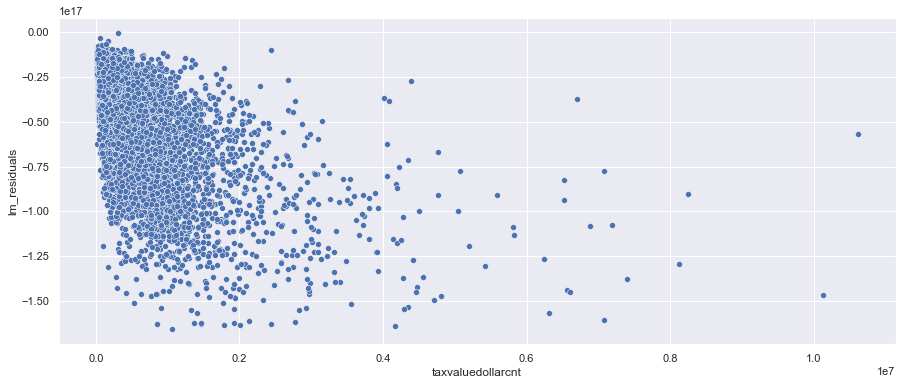

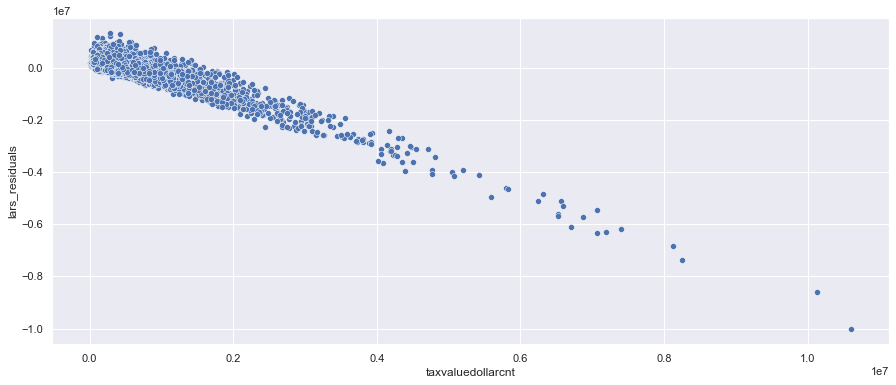

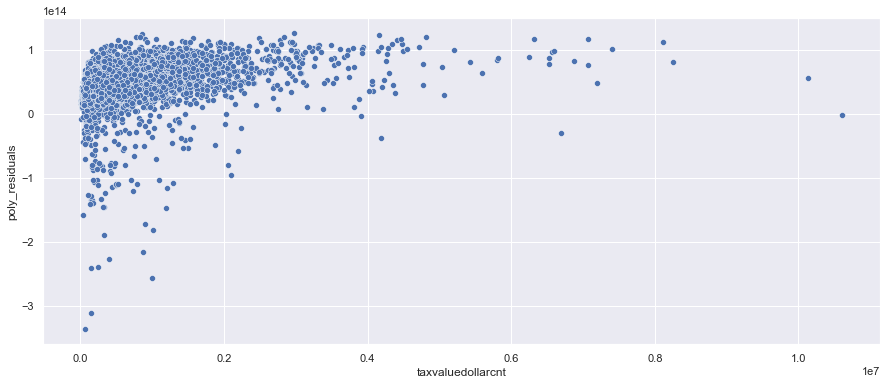

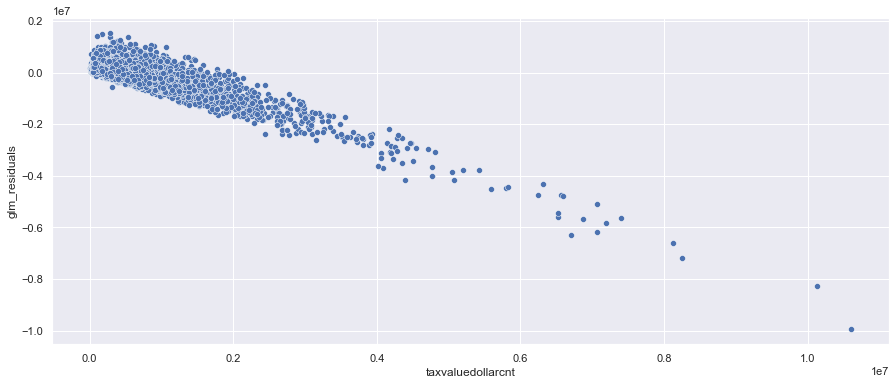

In [69]:
model_types = ['lm_residuals', 'lars_residuals', 'poly_residuals', 'glm_residuals']

for model_type in model_types:
    sns.scatterplot(data = y_validate, x = 'taxvaluedollarcnt', y = model_type)
    plt.show()


Looks like the TweedieRegressor is the best

### Using feature engineering

In [55]:
models =[{
    'model':LinearRegression(normalize = True),
    'model_name':'linear_regression'
},{
    'model':TweedieRegressor(),
    'model_name':'tweedie_regressor'
},{
    'model':LassoLars(alpha=1.0),
    'model_name':'lasso_lars'
}]

outputs = []

y_train_residuals = train[['taxvaluedollarcnt']]
y_validate_residuals = validate[['taxvaluedollarcnt']]

for model_obj in models:
    for k in range(1, 12):
        features = explore.get_k_features (X_train_scaled, y_train['taxvaluedollarcnt'], k)
        model = model_obj['model']
        model.fit(X_train[features], y_train['taxvaluedollarcnt'])
        y_train_pred = model.predict(X_train[features])
        y_validate_pred = model.predict(X_validate[features])
        y_train_residuals[f"{model_obj['model_name']}_{k}_train_residuals"] = y_train_pred - y_train_residuals['taxvaluedollarcnt']
        y_validate_residuals[f"{model_obj['model_name']}_{k}_validate_residuals"] = y_validate_pred - y_validate_residuals['taxvaluedollarcnt']
        
        output = {
            'model_name':model_obj['model_name'],
            'k':len(features),
            'RMSE_train': mean_squared_error(y_train['taxvaluedollarcnt'], y_train_pred)**(0.5),
            'RMSE_validate': mean_squared_error(y_validate['taxvaluedollarcnt'], y_validate_pred)**(0.5),
            'features':features
        }
        outputs.append(output)

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_8596/3803749427.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_residuals[f"{model_obj['model_name']}_{k}_train_residuals"] = y_train_pred - y_train_residuals['taxvaluedollarcnt']
/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_8596/3803749427.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_validate_residuals[f"{model_obj['model_name']}_{k}_validate_residuals"] = y_validate_pred - y_validate_residuals['taxvaluedollarcn

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

In [56]:
y_validate_residuals.describe().T

,count,mean,std,min,25%,50%,75%,max
taxvaluedollarcnt,12311.0,497462.880270,558504.774442,1.168300e+04,194533.500000,370302.000000,608044.500000,1.061040e+07
linear_regression_1_validate_residuals,12311.0,-869.336533,469165.346031,-9.966628e+06,-129860.973440,47990.878684,221269.942276,1.380757e+06
linear_regression_2_validate_residuals,12311.0,-1895.201996,467701.012163,-9.892198e+06,-131930.169530,46392.094771,225629.843122,1.304557e+06
linear_regression_3_validate_residuals,12311.0,-1013.324050,459052.485040,-9.767383e+06,-135633.891089,44677.269094,221222.281198,1.418987e+06
linear_regression_4_validate_residuals,12311.0,-820.025375,454750.506295,-9.723045e+06,-138960.653656,41957.887407,216865.935570,1.557000e+06
linear_regression_5_validate_residuals,12311.0,-49.109970,450173.070319,-9.723811e+06,-132997.734522,33618.394876,213167.778237,1.576753e+06
linear_regression_6_validate_residuals,12311.0,-109.455274,450092.731683,-9.699996e+06,-133373.264236,33033.680496,213147.184066,1.574867e+06
linear_regression_7_validate_residuals,12311.0,-98.933834,450092.470147,-9.699861e+06,-133375.659013,33033.406002,213148.259595,1.574909e+06
linear_regression_8_validate_residuals,12311.0,-383.866025,448263.911267,-9.665542e+06,-133346.814298,33596.262231,213457.845013,1.476887e+06
linear_regression_9_validate_residuals,12311.0,-417.107161,448197.406319,-9.662829e+06,-133552.688757,33249.456878,213409.647858,1.471536e+06


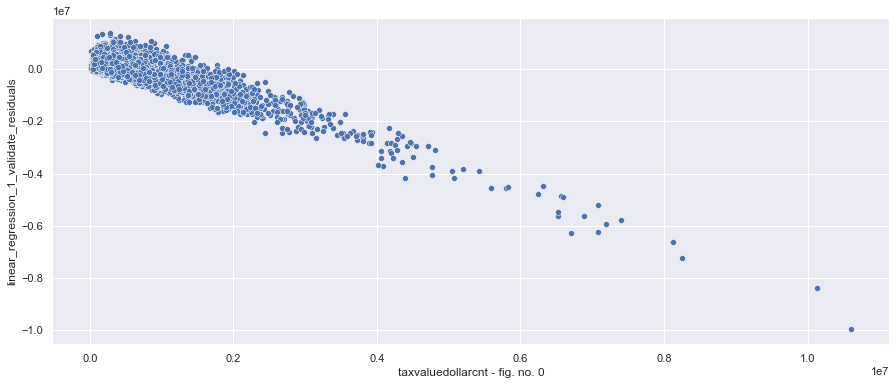

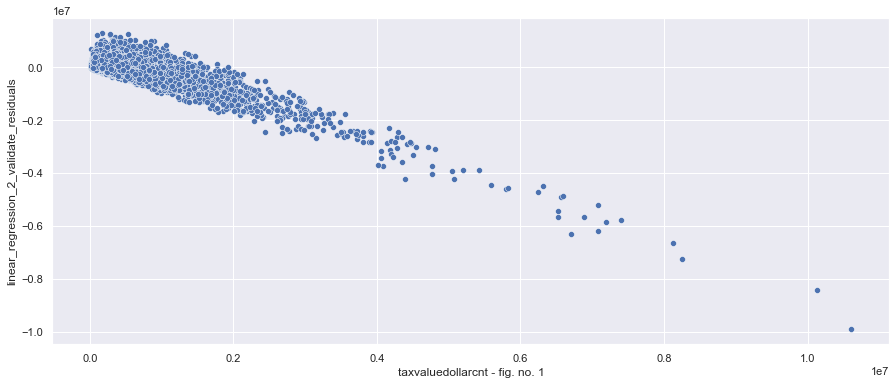

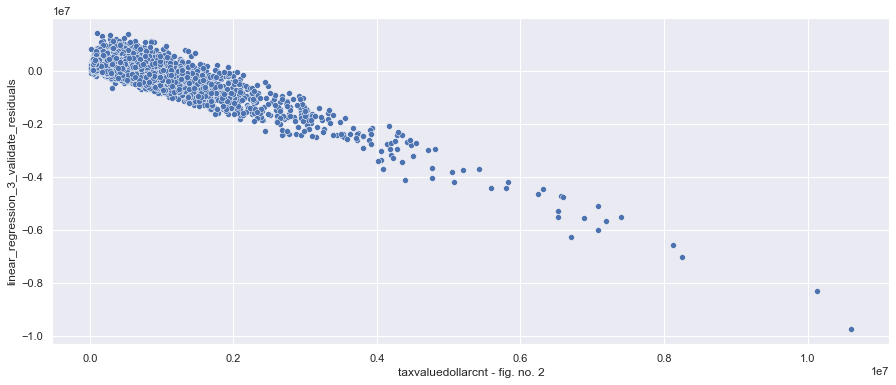

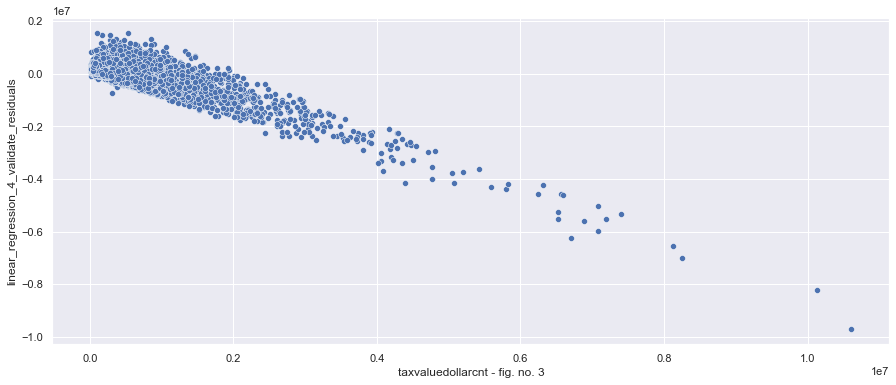

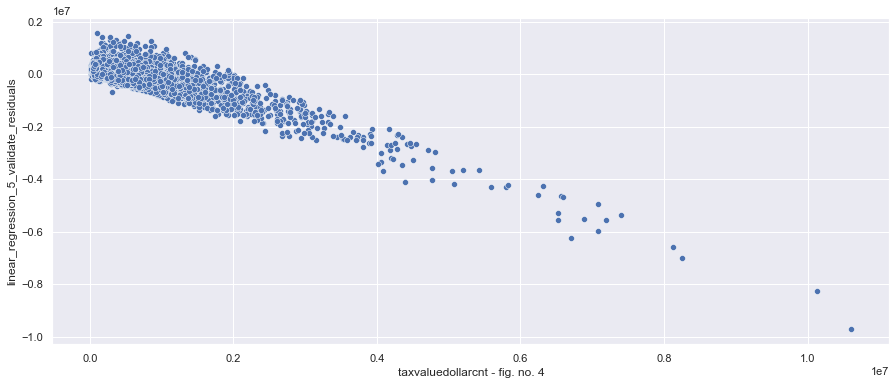

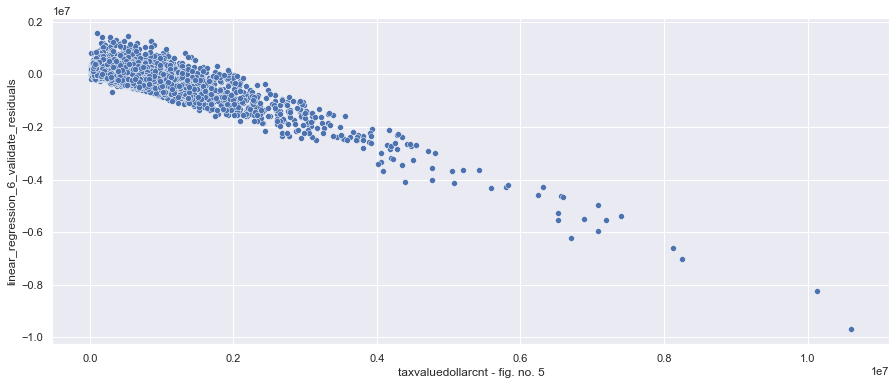

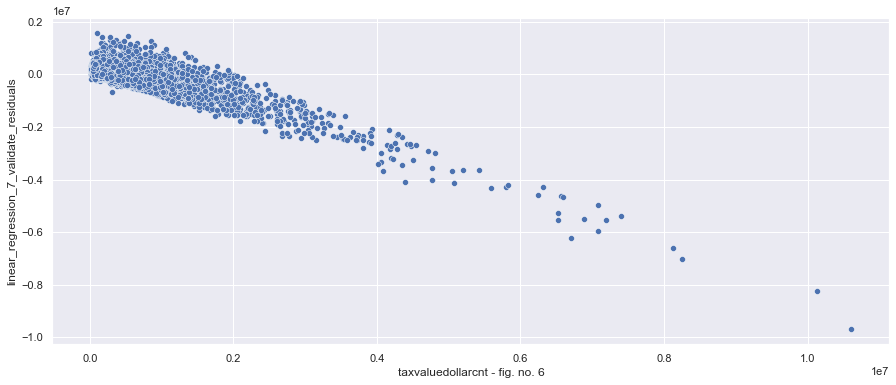

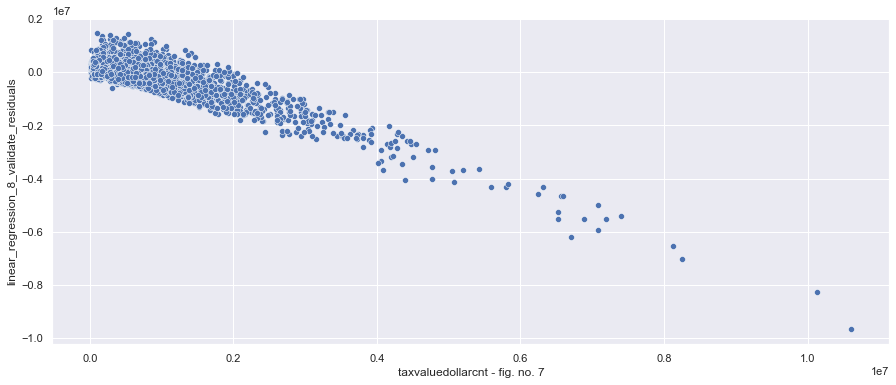

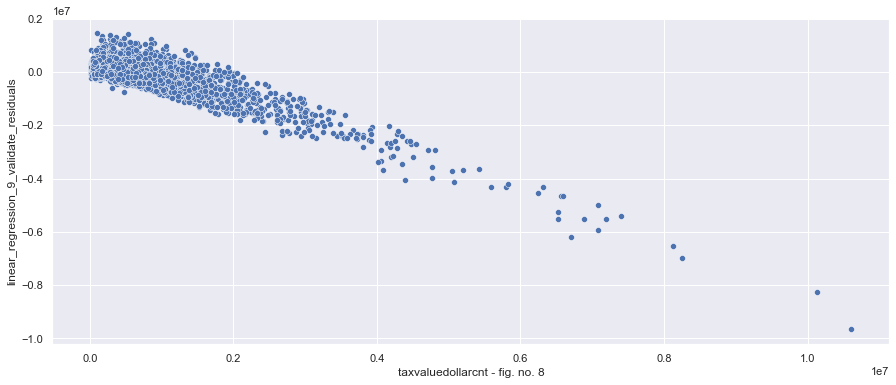

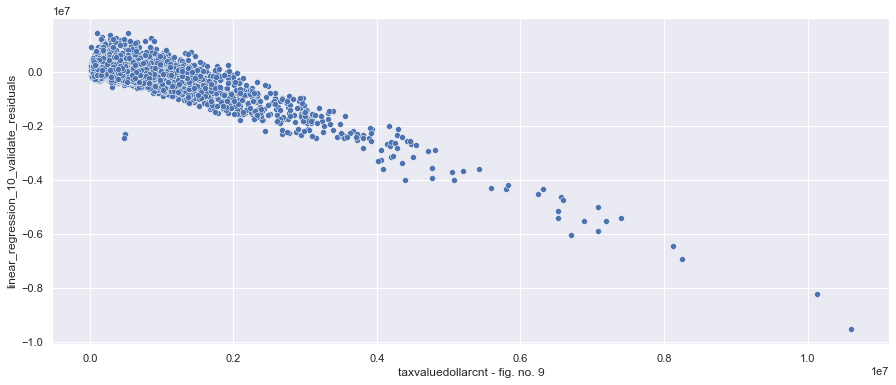

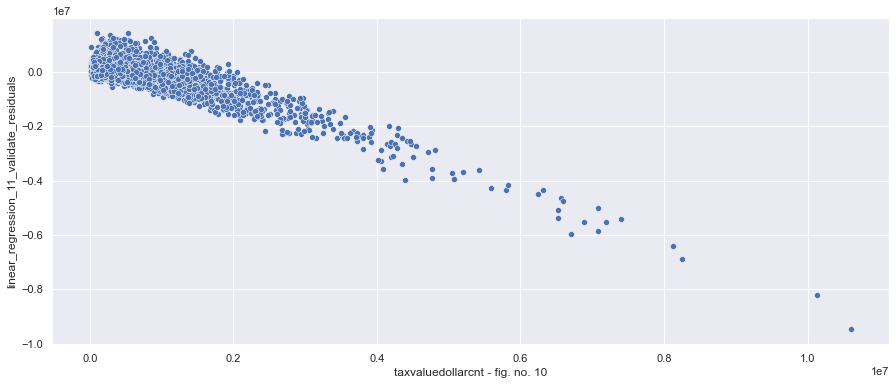

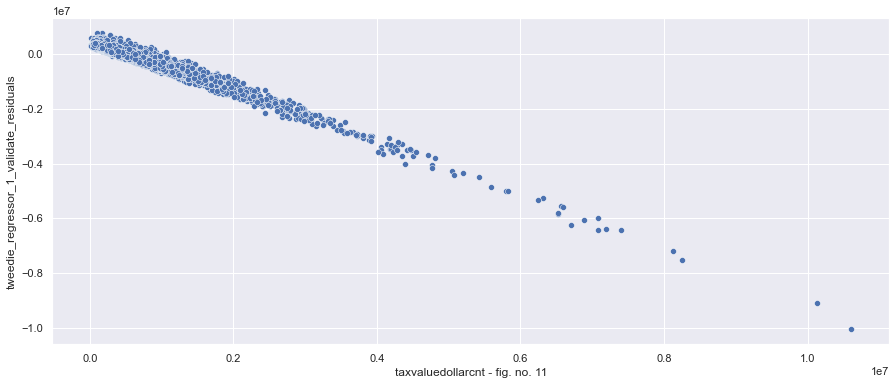

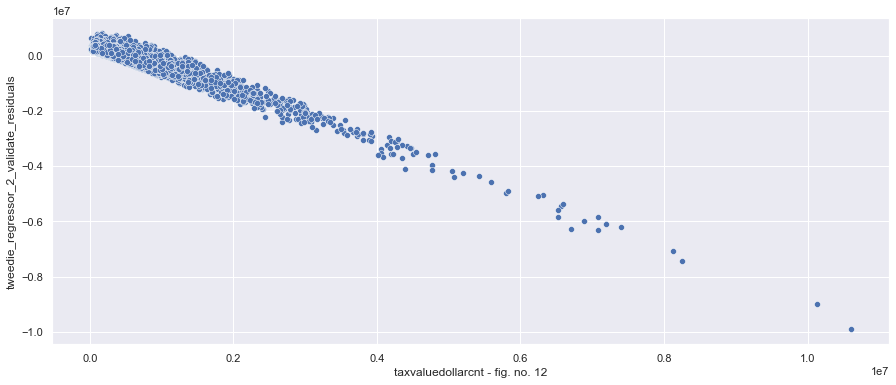

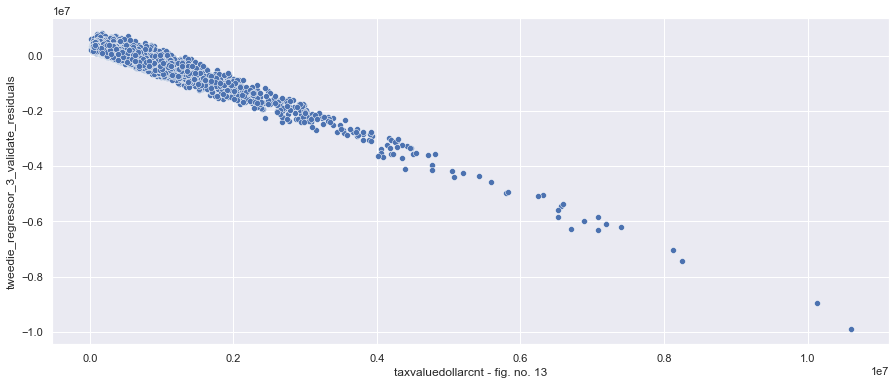

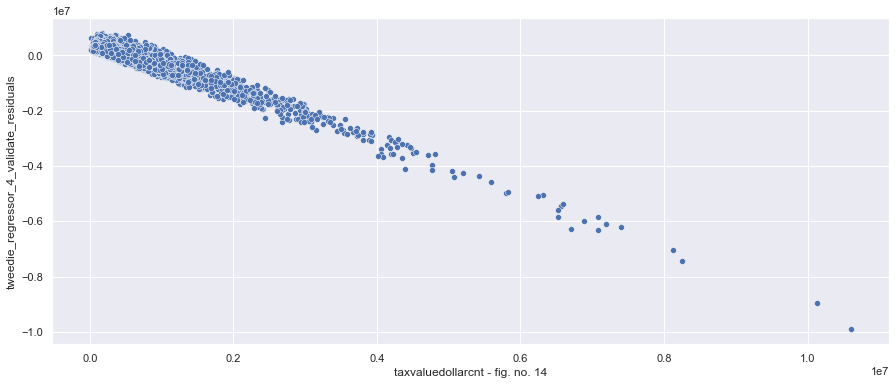

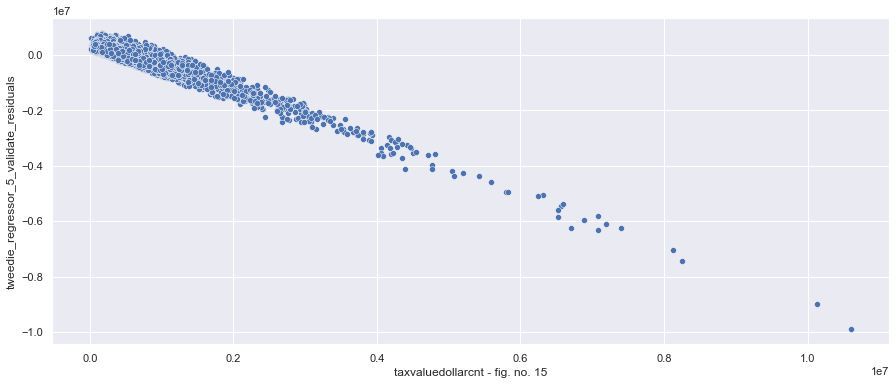

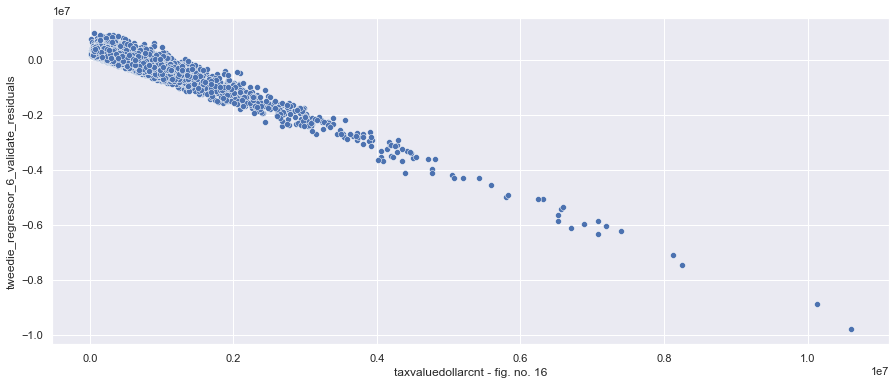

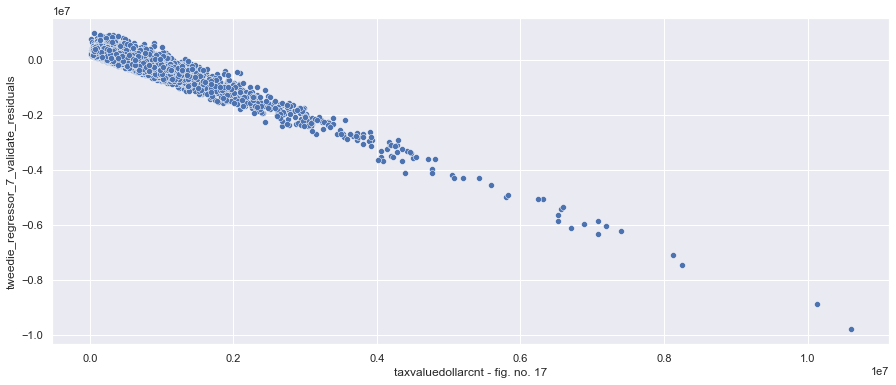

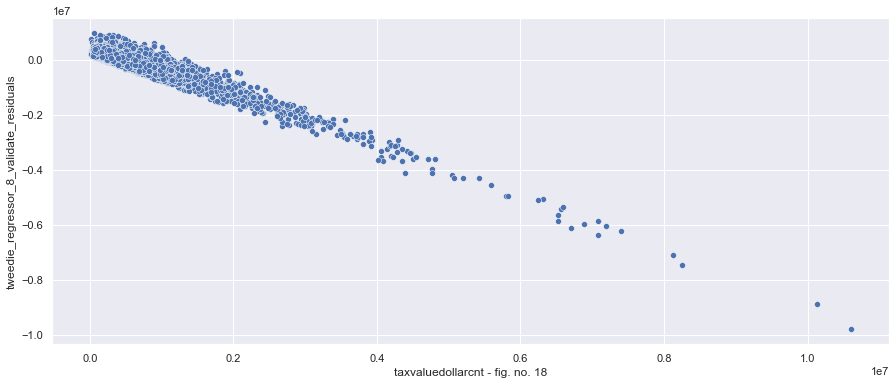

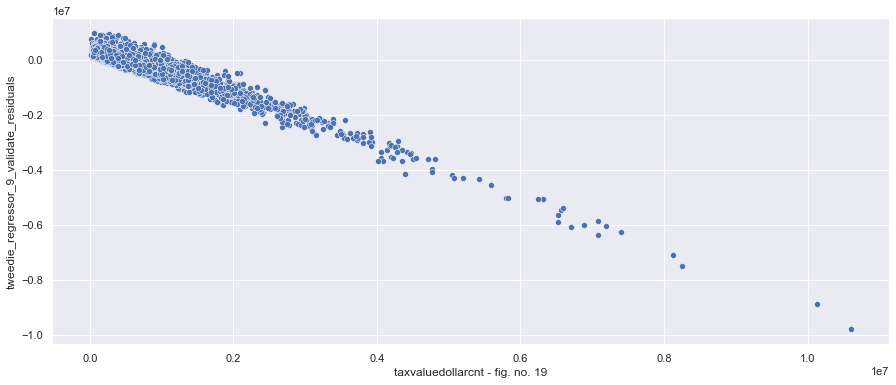

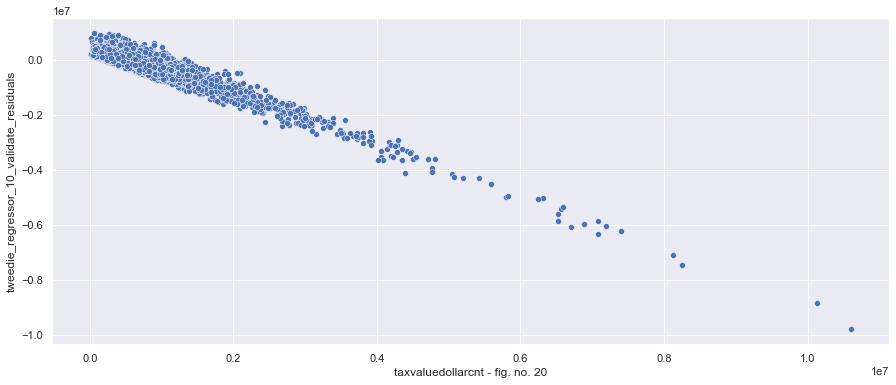

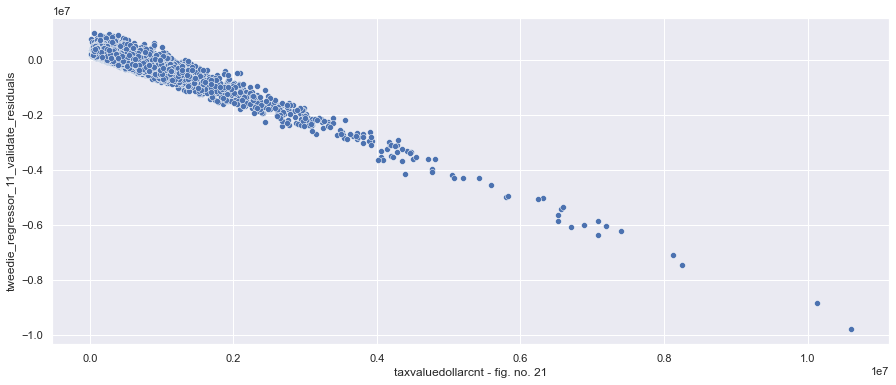

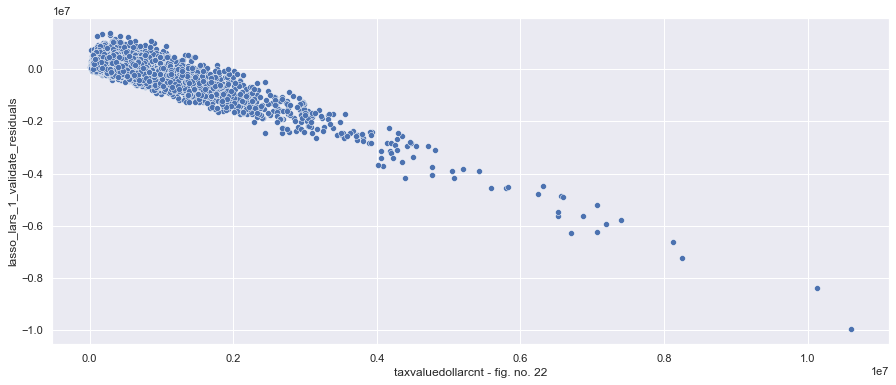

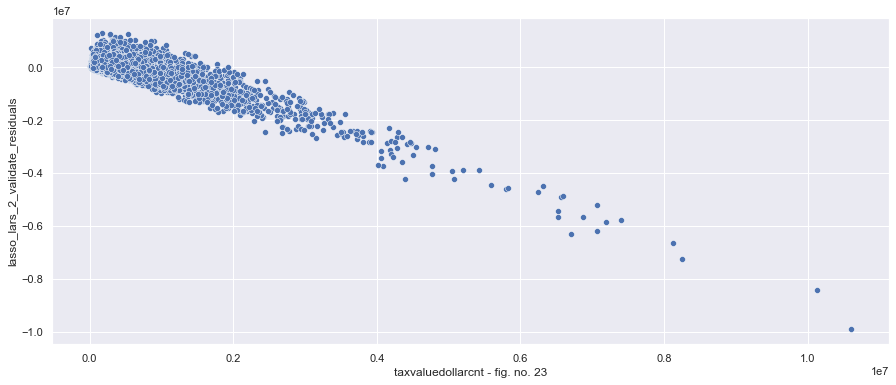

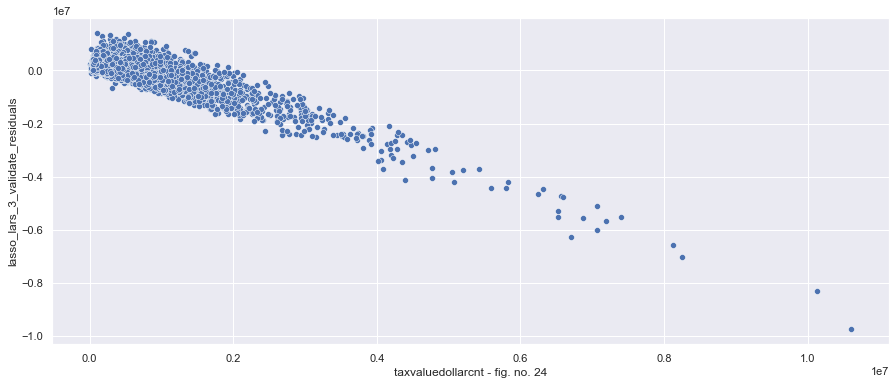

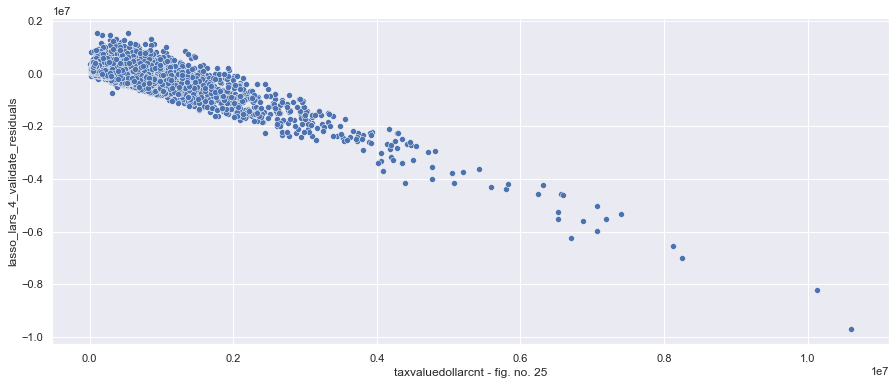

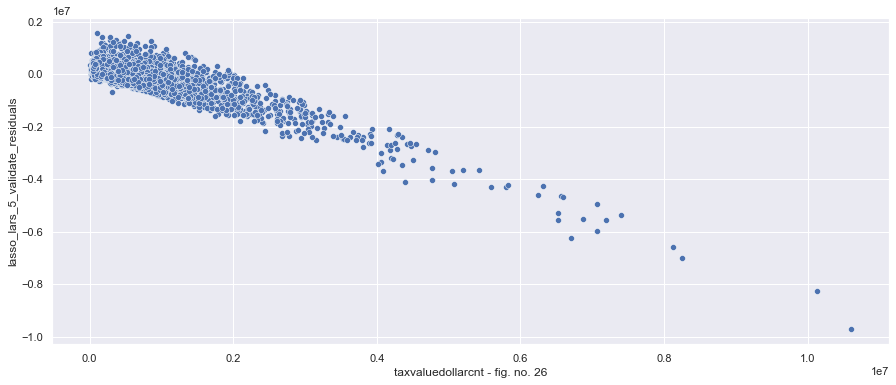

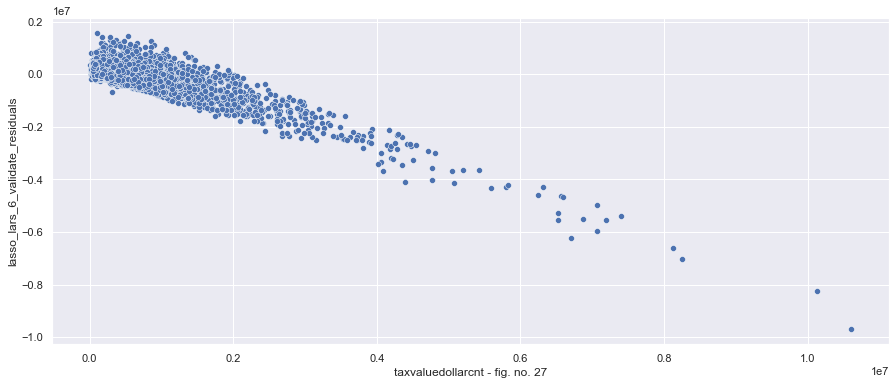

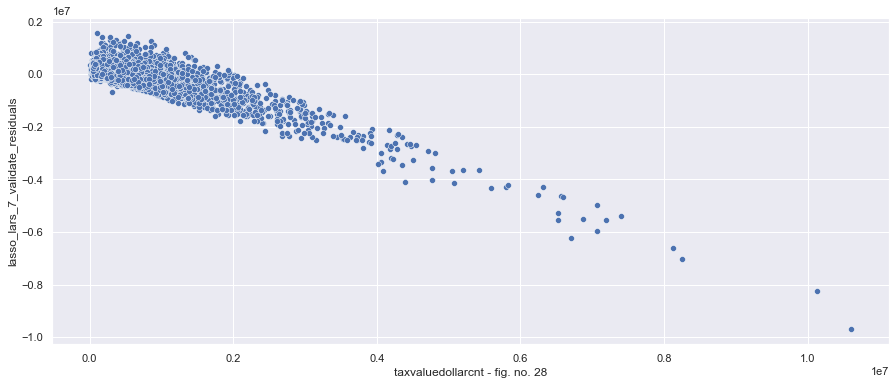

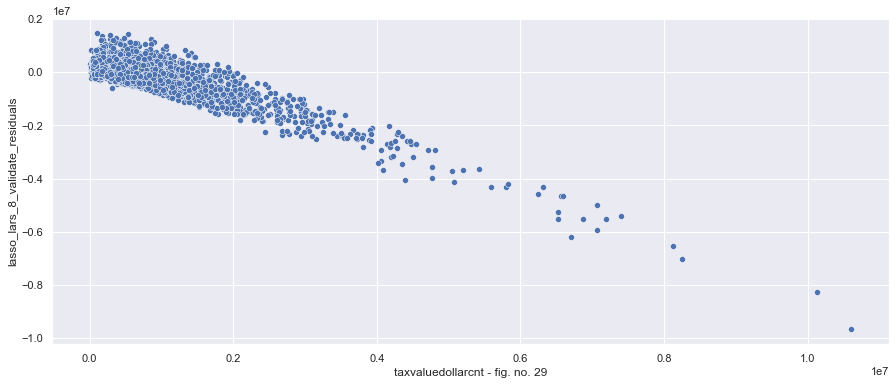

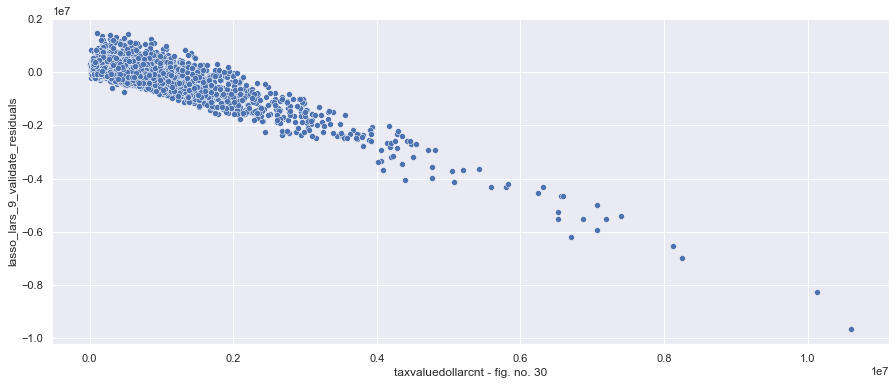

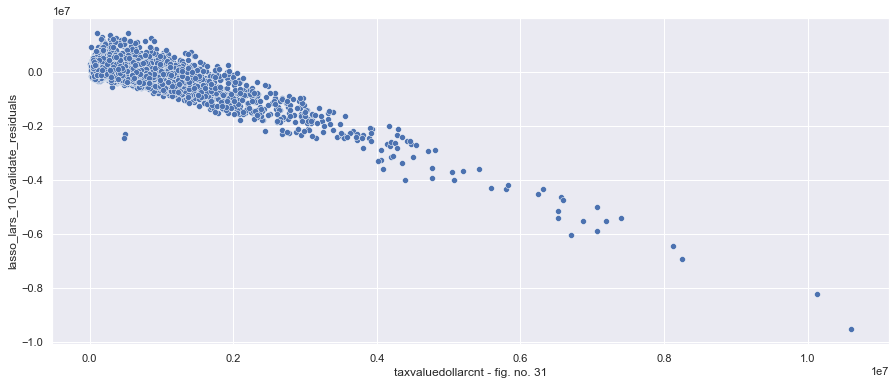

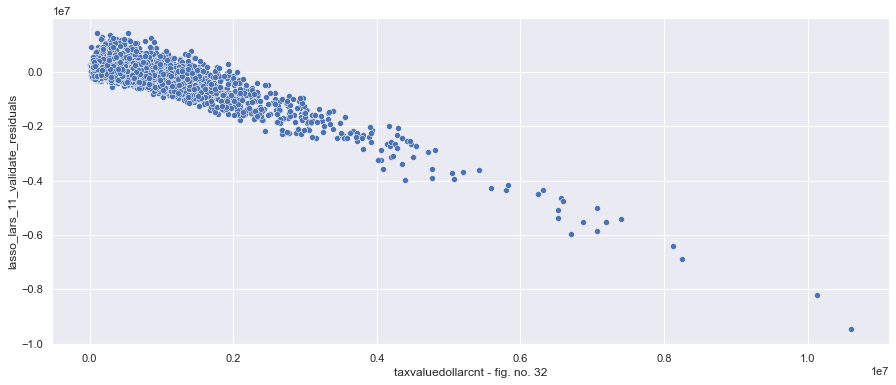

In [57]:
model_types = y_validate_residuals.iloc[:,1:].columns.to_list()

for i, model_type in enumerate(model_types):
    sns.scatterplot(data = y_validate_residuals, x = 'taxvaluedollarcnt', y = model_type)
    plt.xlabel(f"taxvaluedollarcnt - fig. no. {i}")
    plt.show()


In [58]:
y_validate_residuals.iloc[:,1:]

,linear_regression_1_validate_residuals,linear_regression_2_validate_residuals,linear_regression_3_validate_residuals,linear_regression_4_validate_residuals,linear_regression_5_validate_residuals,linear_regression_6_validate_residuals,linear_regression_7_validate_residuals,linear_regression_8_validate_residuals,linear_regression_9_validate_residuals,linear_regression_10_validate_residuals,...,lasso_lars_2_validate_residuals,lasso_lars_3_validate_residuals,lasso_lars_4_validate_residuals,lasso_lars_5_validate_residuals,lasso_lars_6_validate_residuals,lasso_lars_7_validate_residuals,lasso_lars_8_validate_residuals,lasso_lars_9_validate_residuals,lasso_lars_10_validate_residuals,lasso_lars_11_validate_residuals
27247,110916.755741,111657.602158,123439.627762,115738.483986,126299.481240,128504.382066,128520.972155,167011.673772,166760.518036,98558.380498,...,111717.028801,123446.558595,115786.201416,126326.805323,128489.649959,128489.649959,166642.200774,166394.357314,98461.551854,90175.154717
21164,49995.306766,34007.332033,60892.394436,43497.228394,84502.492559,83840.178661,83843.711377,21167.289652,20041.051536,11817.724940,...,34031.200092,60796.473828,43493.435611,84419.518373,83769.837425,83769.837425,21639.148370,20528.127524,12336.591735,13918.544737
32378,430053.047151,443935.294000,551864.095161,615930.672739,651797.701276,646536.180129,646568.070489,718942.074993,719718.734881,732904.543929,...,443159.607331,550607.522605,614334.792447,650132.561544,644971.398441,644971.398441,716709.466976,717475.456484,730593.543558,756042.019610
41773,-21820.530723,-53983.691920,-102275.825506,-99721.459111,-62963.446587,-62528.167292,-62528.420358,-18025.864857,-16760.740209,-23582.202037,...,-53778.444017,-101855.407924,-99314.569898,-62627.537309,-62200.560514,-62200.560514,-18085.856668,-16837.844968,-23631.515889,-17245.107554
24554,-16611.614704,-29447.045633,-130963.437089,-176798.872252,-234071.928543,-236805.738529,-236803.648696,-226830.344955,-243443.041146,-191140.592813,...,-29416.476565,-130480.553166,-176073.235895,-233235.697583,-235917.362986,-235917.362986,-226031.323289,-242419.298366,-190329.998951,-244652.020527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14863,-417253.230430,-454196.054813,-498173.035028,-512081.036087,-471136.861064,-471326.649893,-471329.356574,-419827.625318,-414376.867595,-365432.022670,...,-454000.966506,-497782.003572,-511616.345439,-470751.233855,-470937.402659,-470937.402659,-419884.135871,-414507.100542,-365759.642202,-352652.289447
12833,-239880.425141,-238631.103917,-227308.137182,-274524.415222,-172543.081615,-170611.187117,-170609.368718,-190636.012092,-190935.336565,-221906.529681,...,-238570.596467,-227298.080166,-274264.292586,-172479.885525,-170584.839905,-170584.839905,-190437.218926,-190732.503570,-221578.842032,-236500.548492
35654,461615.775727,469023.329718,439011.663297,448956.955199,519962.791162,517825.700527,517823.876005,474260.360262,473276.975261,452185.892173,...,468881.165406,439003.218499,448895.838406,519764.561689,517668.233835,517668.233835,474484.717895,473514.645228,452509.952735,445251.764744
4315,150821.217637,151364.361734,127549.990047,191706.956278,191902.041239,187030.312149,187027.737613,210398.002871,213863.400407,240443.422268,...,151207.606514,127499.341771,191316.521553,191511.229803,186732.423878,186732.423878,209899.402366,213317.934220,239791.255768,249617.692167


In [59]:
model_results = pd.DataFrame(outputs)
model_results.iloc[:,:-1].sort_values(['RMSE_validate'])

,model_name,k,RMSE_train,RMSE_validate
10,linear_regression,11,434383.437946,442549.062455
32,lasso_lars,11,434384.049910,442577.360625
9,linear_regression,10,435330.486600,444435.971446
31,lasso_lars,10,435331.001006,444451.942880
8,linear_regression,9,438920.753457,448179.396916
30,lasso_lars,9,438921.204789,448198.198935
7,linear_regression,8,438988.278865,448245.869435
29,lasso_lars,8,438988.717771,448265.112946
6,linear_regression,7,440438.048495,450074.200555
5,linear_regression,6,440438.048495,450074.464517


<AxesSubplot:xlabel='k', ylabel='RMSE_validate'>

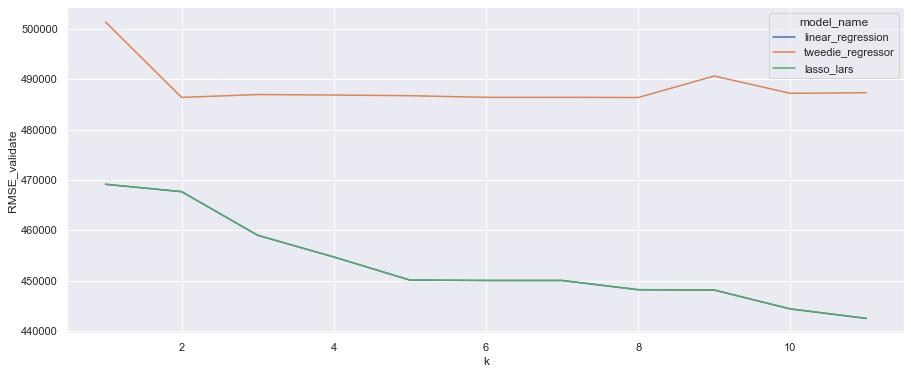

In [60]:
sns.lineplot(data = model_results, x = 'k', y = 'RMSE_validate',hue = 'model_name')

### Test model

In [65]:
explore.get_k_features(X_train.drop(columns='calculatedfinishedsquarefeet'), y_train.taxvaluedollarcnt, 2)

['bathroomcnt', 'calculatedfinishedsquarefeet_scaled']